In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from IPython.display import display
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, StratifiedKFold, RandomizedSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, roc_curve, roc_auc_score, precision_recall_curve, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import warnings 
warnings.filterwarnings('ignore')
import shap
shap.initjs()
from Ahmedinio import *
from sekkatinio import *

In [3]:
df = pd.read_csv("churn-bigml-80.csv")

In [4]:
numeric_vars = df.select_dtypes(include=['int', 'float'])
categ_vars = df.select_dtypes(include=['object', 'boolean'])

In [5]:
df.shape

(2666, 20)

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<AxesSubplot:>

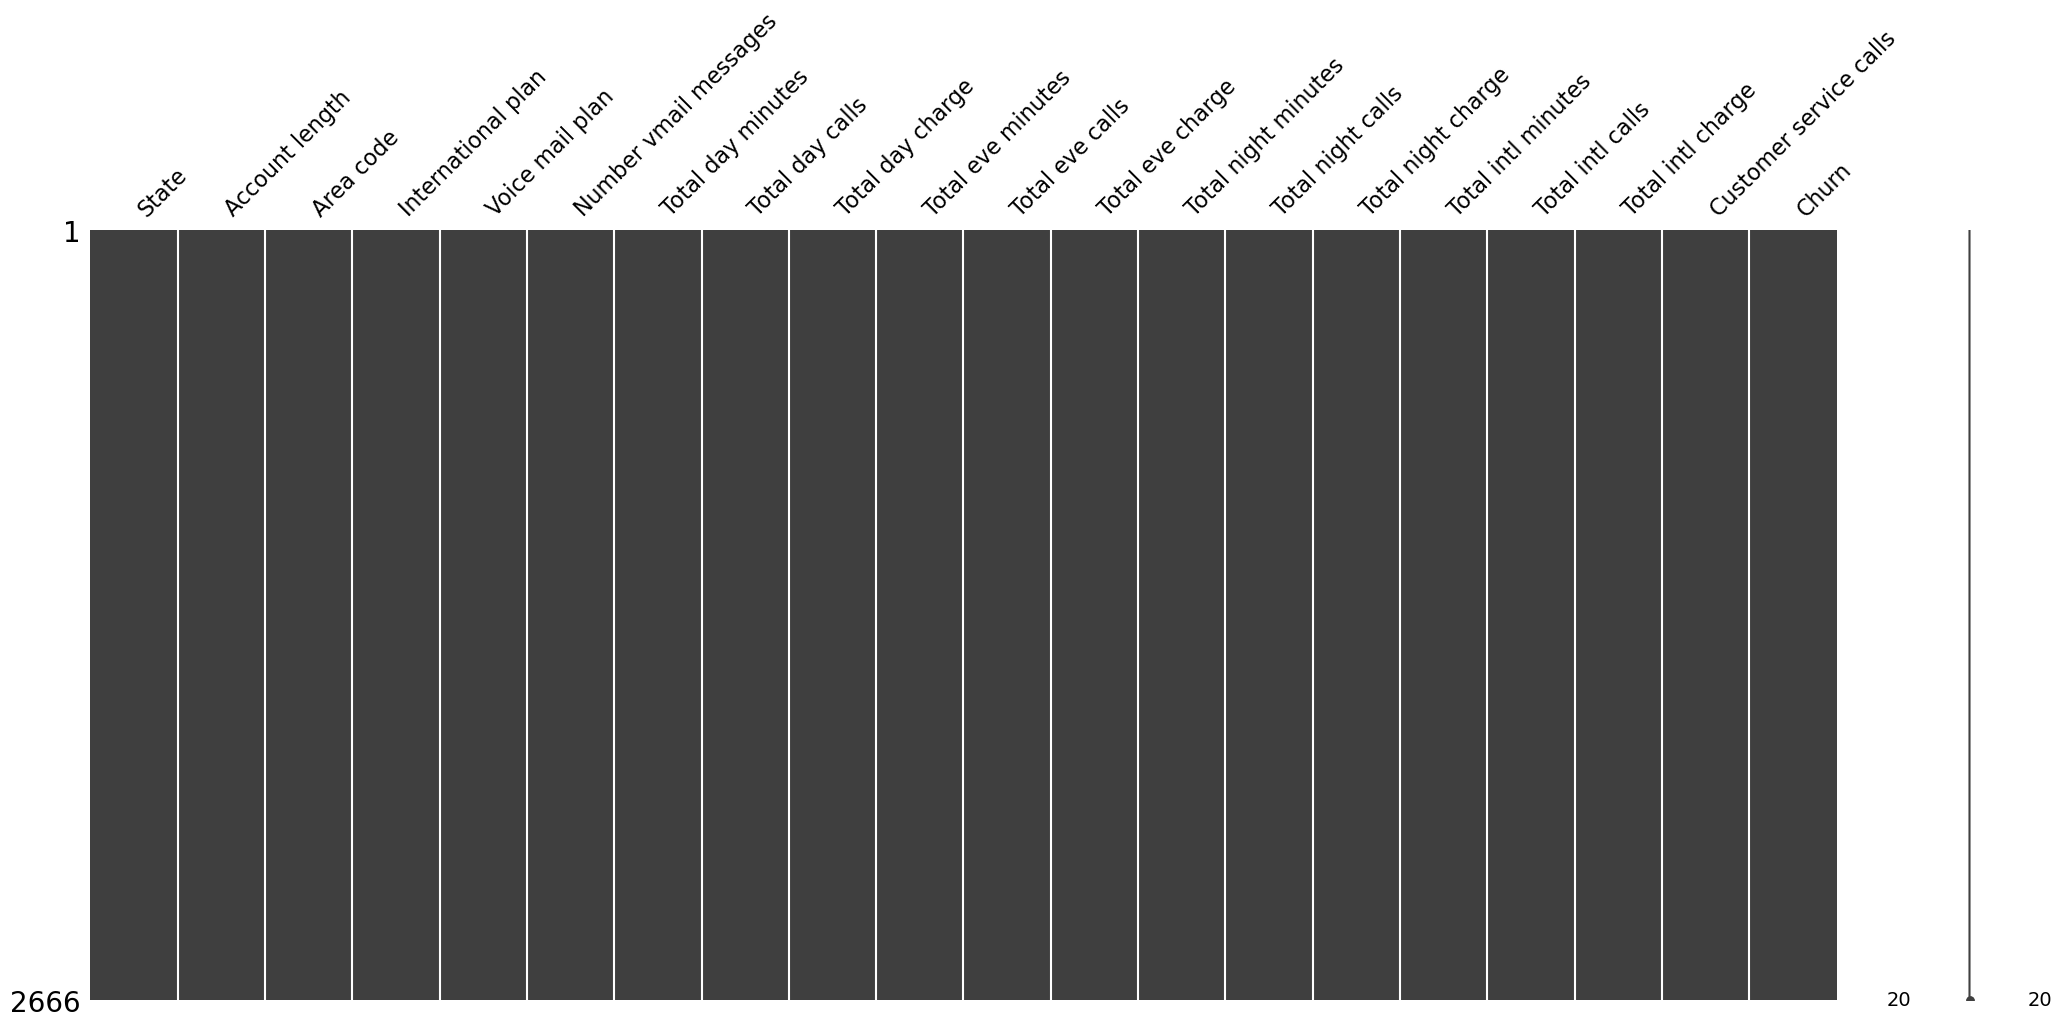

In [9]:
msno.matrix(df)

In [10]:
variable_list = df.columns.tolist()

In [11]:
widgets.interact(plot_var, variable=variable_list)

interactive(children=(Dropdown(description='variable', options=('State', 'Account length', 'Area code', 'Inter…

<function Ahmedinio.plot_var(variable)>

In [12]:
widgets.interact(hist_var, variable=variable_list)

interactive(children=(Dropdown(description='variable', options=('State', 'Account length', 'Area code', 'Inter…

<function Ahmedinio.hist_var(variable)>

In [13]:
widgets.interact(kde_var, variable=numeric_vars)

interactive(children=(Dropdown(description='variable', options=('Account length', 'Area code', 'Number vmail m…

<function Ahmedinio.kde_var(variable)>

In [14]:
widgets.interact(kde_churn, variable=numeric_vars)

interactive(children=(Dropdown(description='variable', options=('Account length', 'Area code', 'Number vmail m…

<function Ahmedinio.kde_churn(variable)>

# commentaires sur kdeplot

Account length : on remarque que si 100 < Account length < 125 la probabilité de churn est élevée

Total day minutes : Total day minutes > 250 la proba de churn est élevée 

Total day charge : Total day charge > 40 le proba de churn est plus élevée

Total eve minutes : Total eve minutes > 250 proba de churn élevée 

Total eve charge : Total eve charge > 20 proba de churn élevée 

Total intl minutes : Total intl minutes > 12 pproba de churn élevée 

Total intl calls : entre 0 et 4 la proba de churn plus élevée 

Total intl charge : Total intl charge > 3 proba de churn élevée 

Customer service calls : Customer service calls > 3 proba de churn élevée 

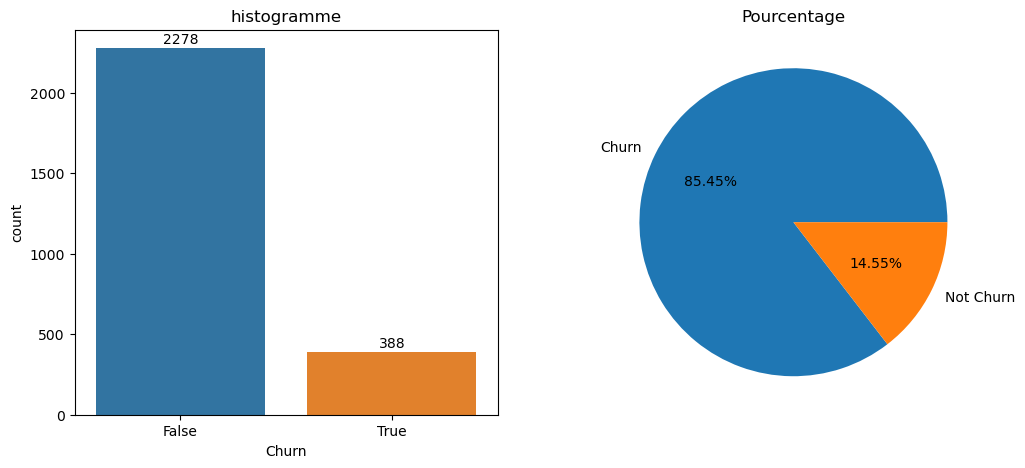

In [15]:
percent_churn()

In [16]:
widgets.interact(boxplot_var, column_name=numeric_vars)

interactive(children=(Dropdown(description='column_name', options=('Account length', 'Area code', 'Number vmai…

<function Ahmedinio.boxplot_var(column_name)>

Pourcentage d'outliers pour Account length : 0.45%
Pourcentage d'outliers pour Area code : 0.0%
Pourcentage d'outliers pour Number vmail messages : 0.08%
Pourcentage d'outliers pour Total day minutes : 0.79%
Pourcentage d'outliers pour Total day calls : 0.68%
Pourcentage d'outliers pour Total day charge : 0.79%
Pourcentage d'outliers pour Total eve minutes : 0.64%
Pourcentage d'outliers pour Total eve calls : 0.56%
Pourcentage d'outliers pour Total eve charge : 0.64%
Pourcentage d'outliers pour Total night minutes : 0.83%
Pourcentage d'outliers pour Total night calls : 0.71%
Pourcentage d'outliers pour Total night charge : 0.83%
Pourcentage d'outliers pour Total intl minutes : 1.39%
Pourcentage d'outliers pour Total intl calls : 2.48%
Pourcentage d'outliers pour Total intl charge : 1.5%
Pourcentage d'outliers pour Customer service calls : 7.88%


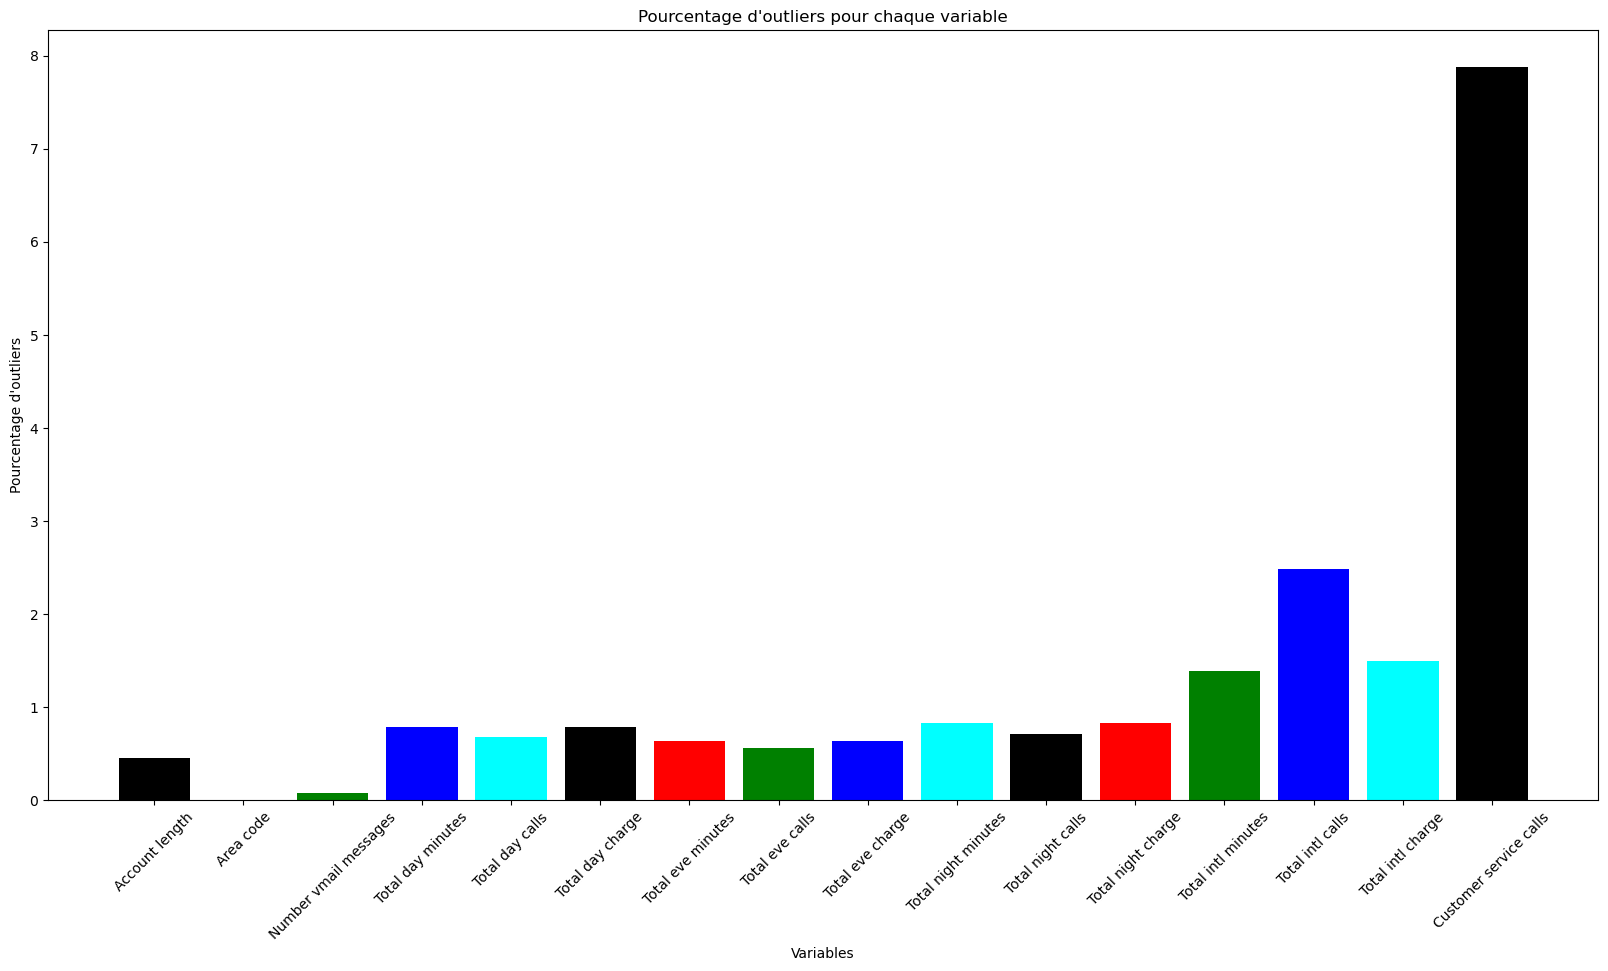

In [17]:
outliers_percent()

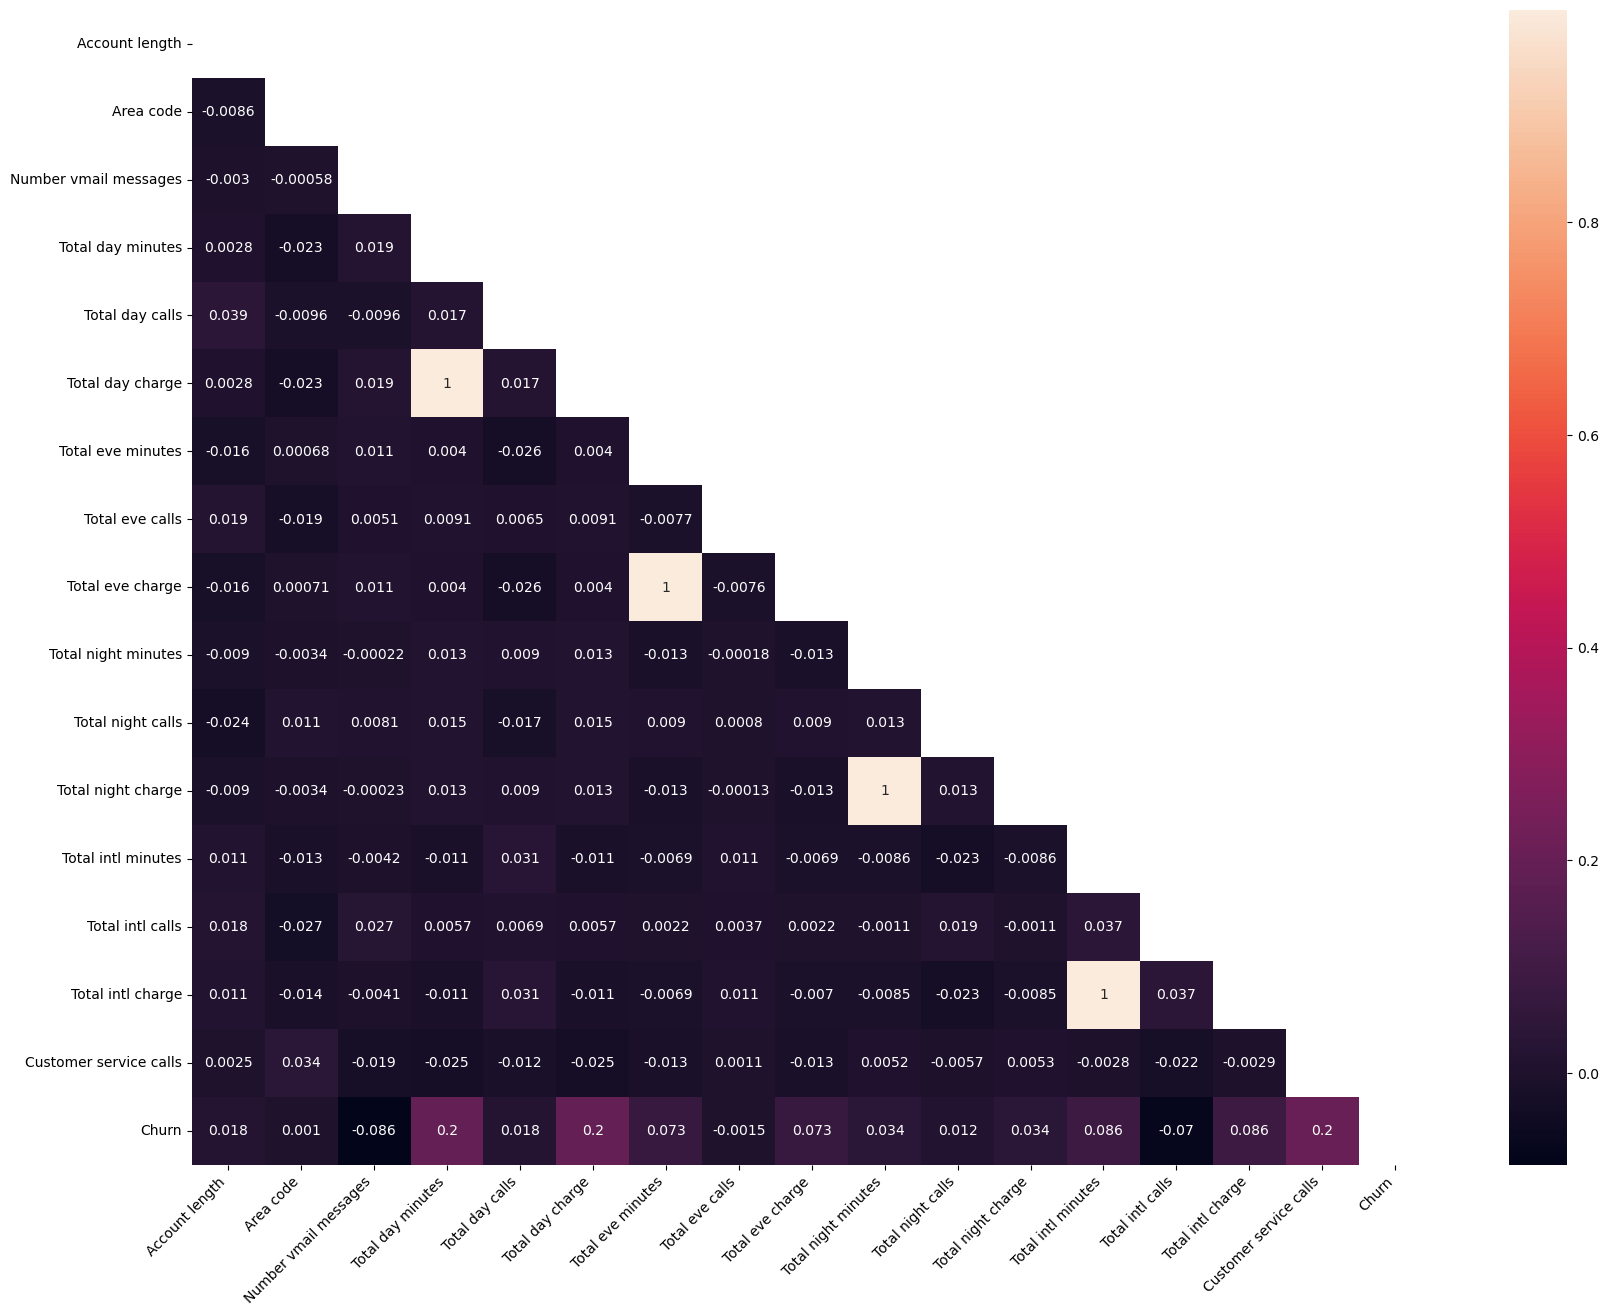

In [18]:
corr_lin()

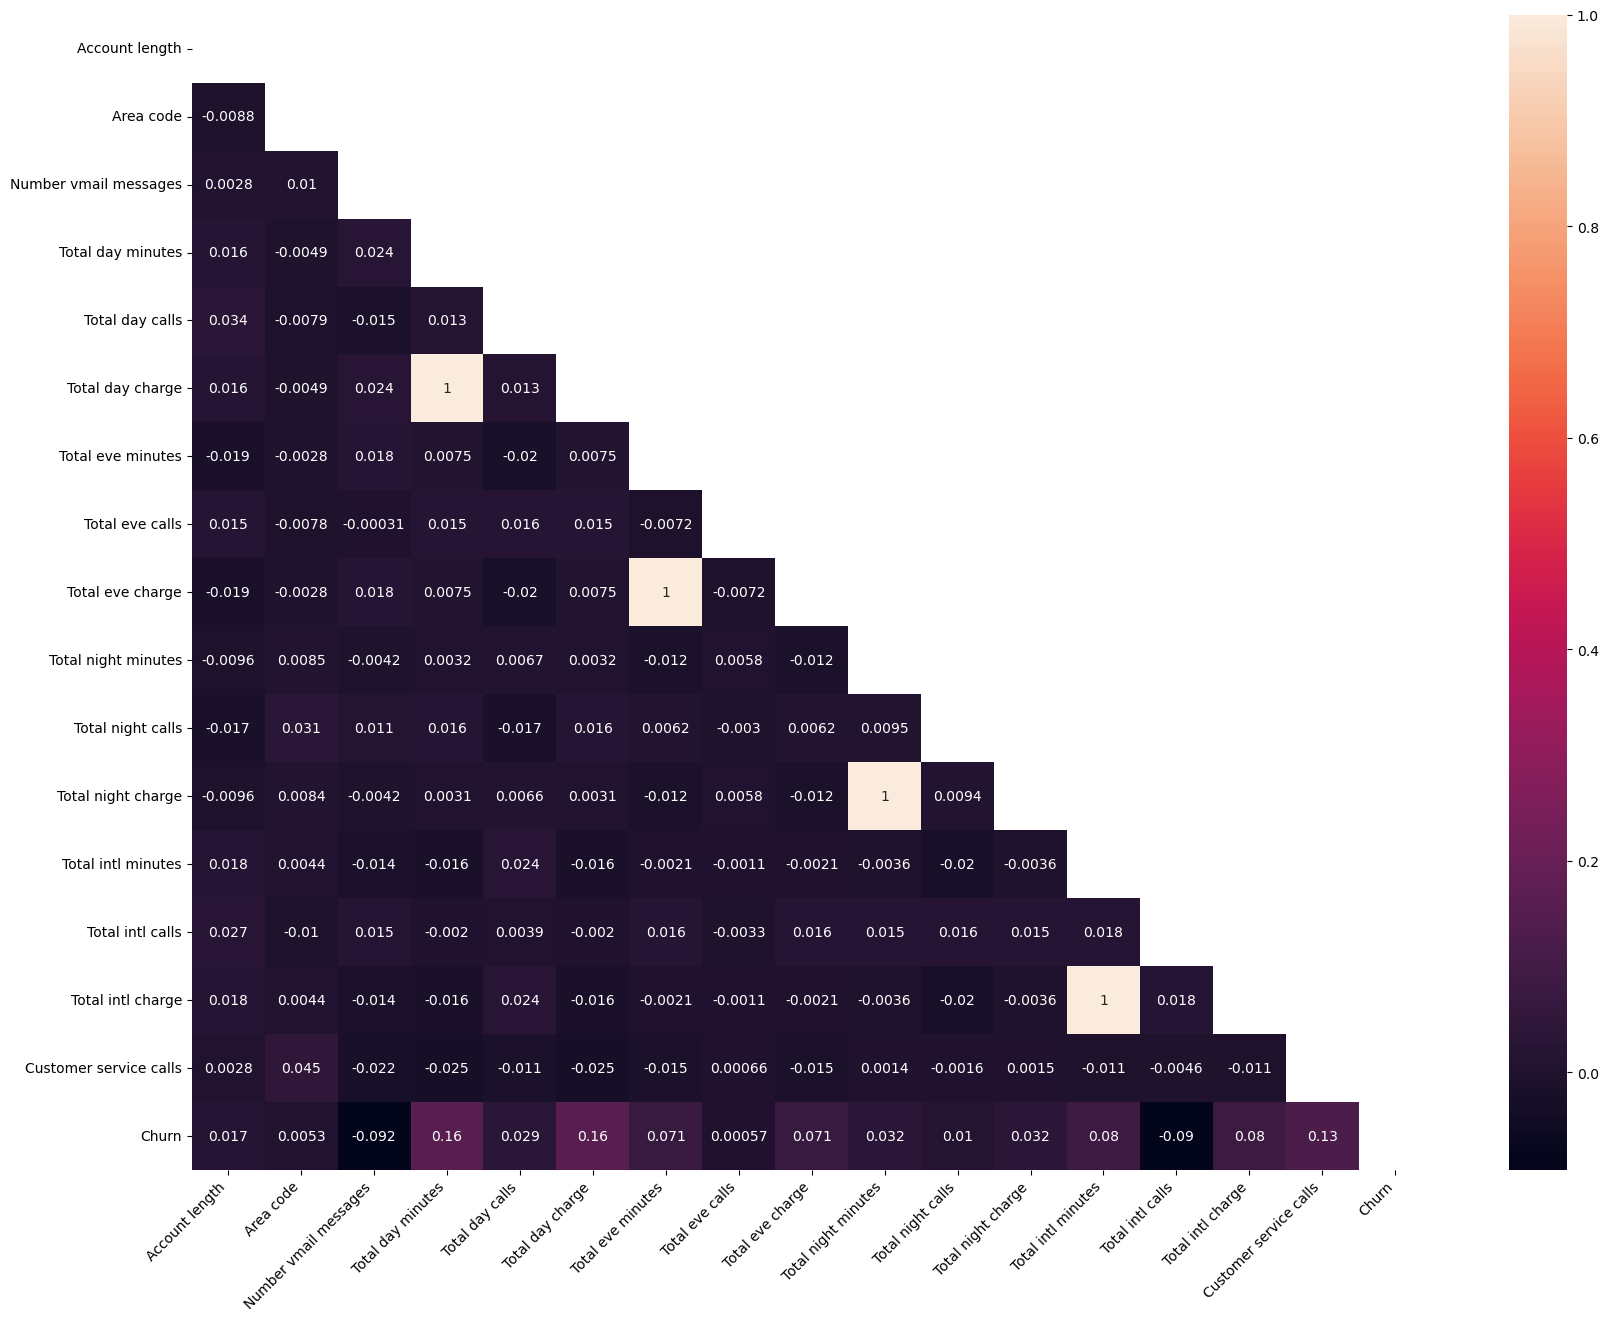

In [19]:
corr_nl()

In [20]:
test_models(preprocessorm, models)

-------Logistic Regression Metrics:---------

Matrice de confusion Test: 
[[349 106]
 [ 23  56]]

Classification report Test : 
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       455
           1       0.35      0.71      0.46        79

    accuracy                           0.76       534
   macro avg       0.64      0.74      0.65       534
weighted avg       0.85      0.76      0.79       534

-------KNN Metrics:---------

Matrice de confusion Test: 
[[454   1]
 [ 71   8]]

Classification report Test : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       455
           1       0.89      0.10      0.18        79

    accuracy                           0.87       534
   macro avg       0.88      0.55      0.55       534
weighted avg       0.87      0.87      0.82       534

-------Random Forest Metrics:---------

Matrice de confusion Test: 
[[454   1]
 [ 33  46]]

Classification

In [21]:
test_smote(preprocessorm, smote, models1)

-------Logistic Regression Metrics:---------

Matrice de confusion Test: 
[[348 107]
 [ 27  52]]

Classification report Test : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       455
           1       0.33      0.66      0.44        79

    accuracy                           0.75       534
   macro avg       0.63      0.71      0.64       534
weighted avg       0.84      0.75      0.78       534

-------KNN Metrics:---------

Matrice de confusion Test: 
[[344 111]
 [ 34  45]]

Classification report Test : 
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       455
           1       0.29      0.57      0.38        79

    accuracy                           0.73       534
   macro avg       0.60      0.66      0.60       534
weighted avg       0.82      0.73      0.76       534

-------Random Forest Metrics:---------

Matrice de confusion Test: 
[[435  20]
 [ 19  60]]

Classification

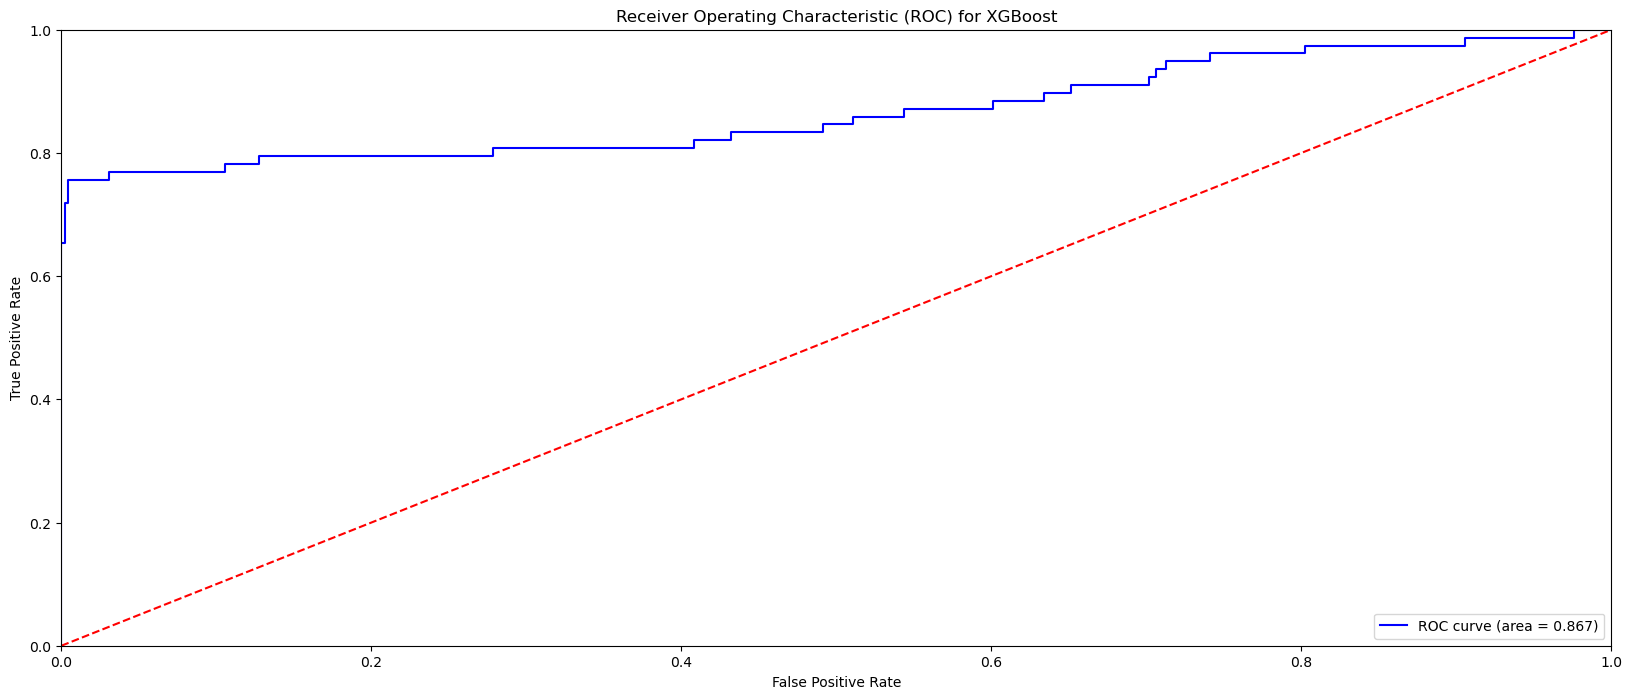

scores de base : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.95      0.76      0.84        78

    accuracy                           0.96       534
   macro avg       0.96      0.87      0.91       534
weighted avg       0.96      0.96      0.96       534
 

scores après calibration
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       456
           1       0.97      0.73      0.83        78

    accuracy                           0.96       534
   macro avg       0.96      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534
 



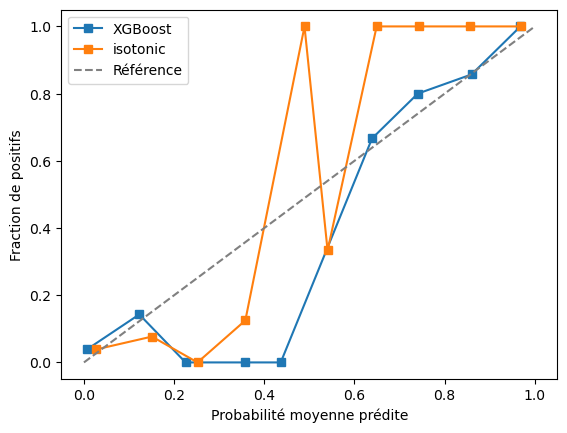



threshold choisi : 0.39
---------- Precision-Recall graphe---------- 

threshold d'intersection est : 0.23 

scores de base : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.95      0.76      0.84        78

    accuracy                           0.96       534
   macro avg       0.96      0.87      0.91       534
weighted avg       0.96      0.96      0.96       534


scores calibrés après modification de threshold: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       456
           1       0.97      0.77      0.86        78

    accuracy                           0.96       534
   macro avg       0.96      0.88      0.92       534
weighted avg       0.96      0.96      0.96       534



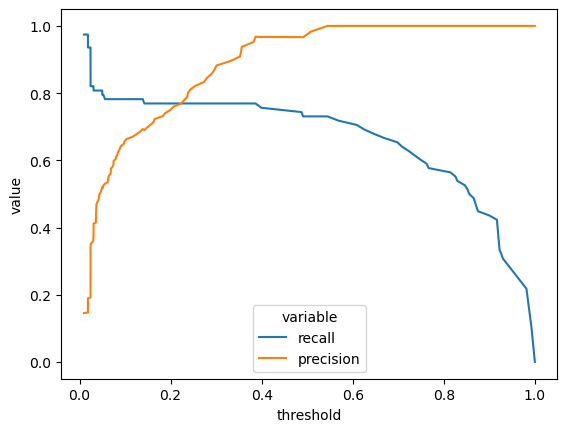

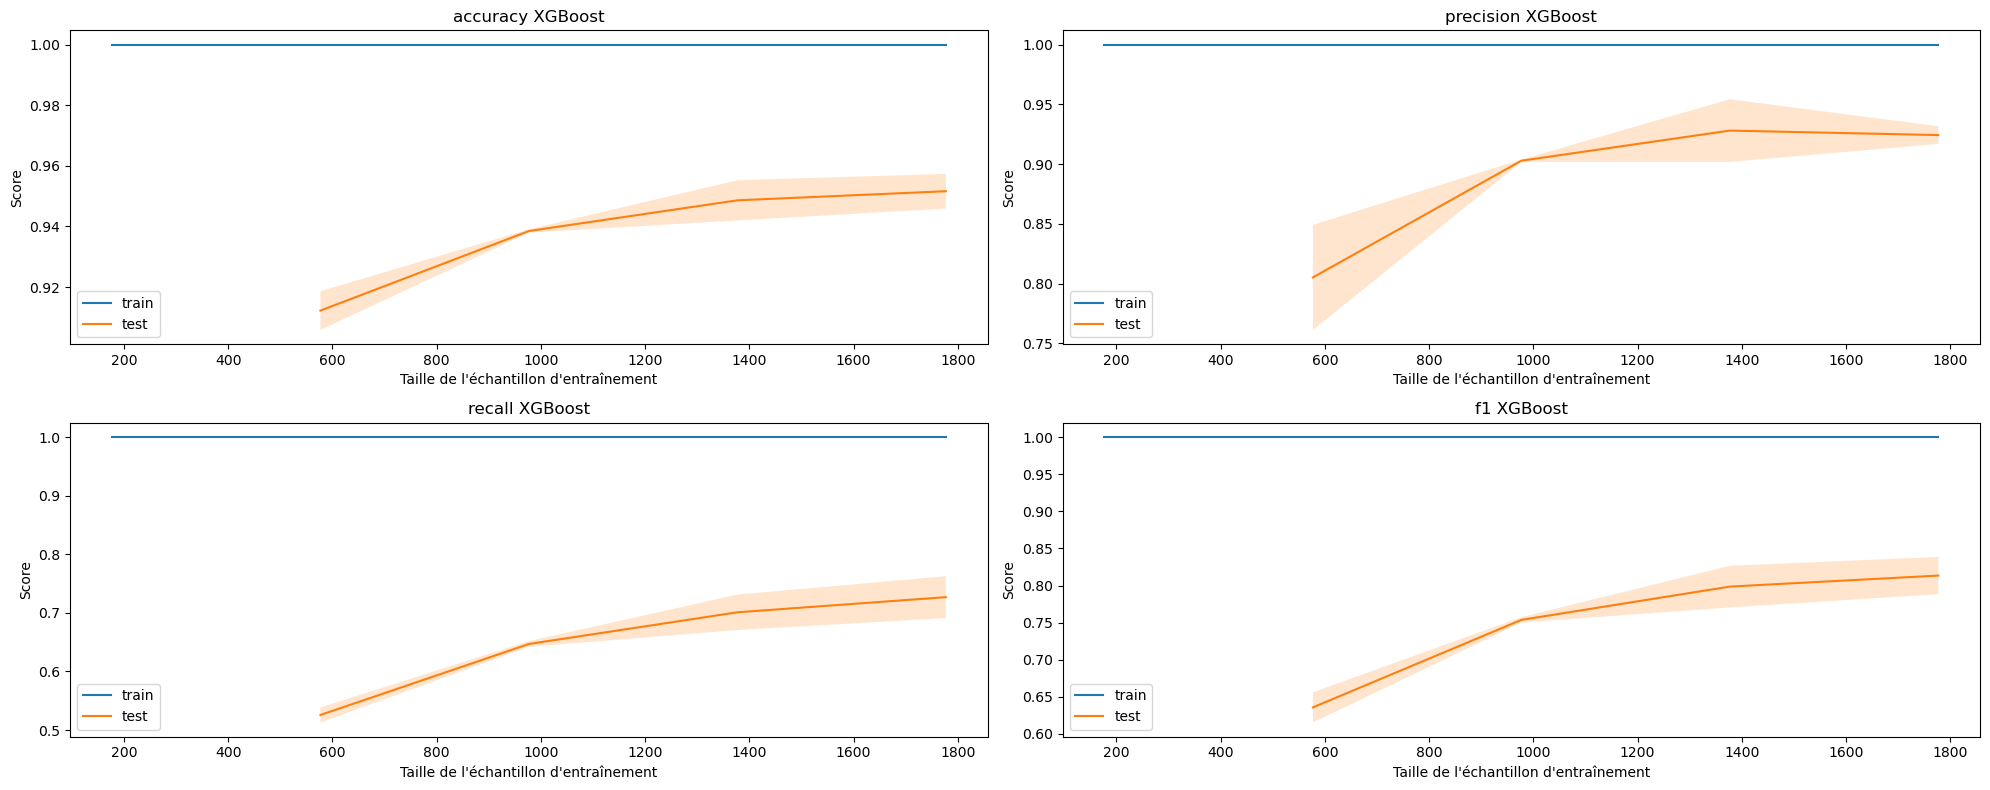

In [22]:
models_aff(pipeline_xgb, data, 'xgb')

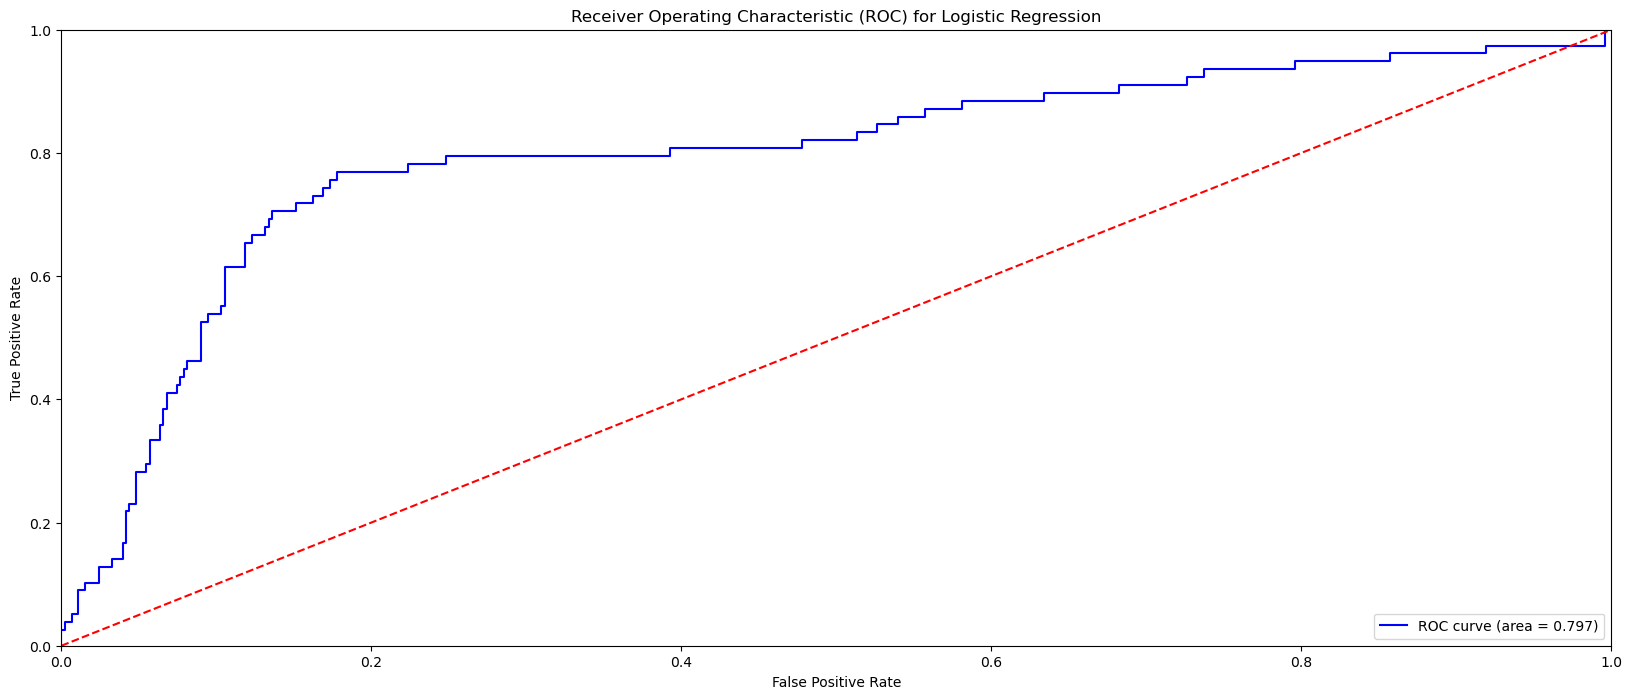

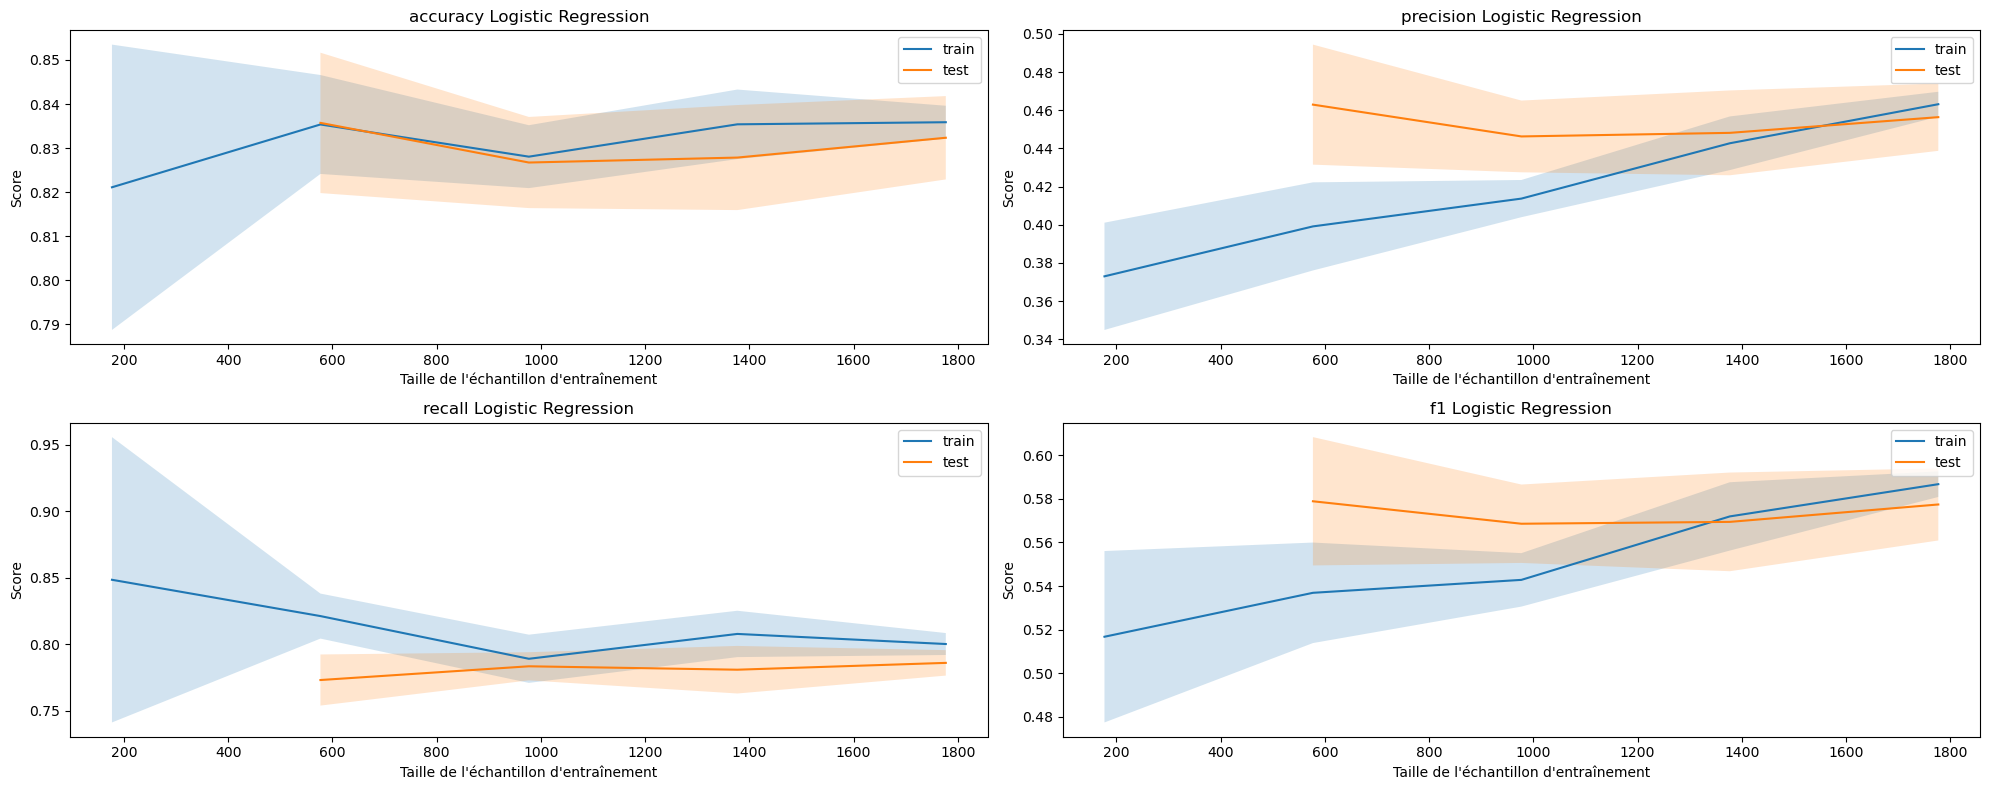

In [23]:
models_aff(pipeline_lr, data1, 'lr')

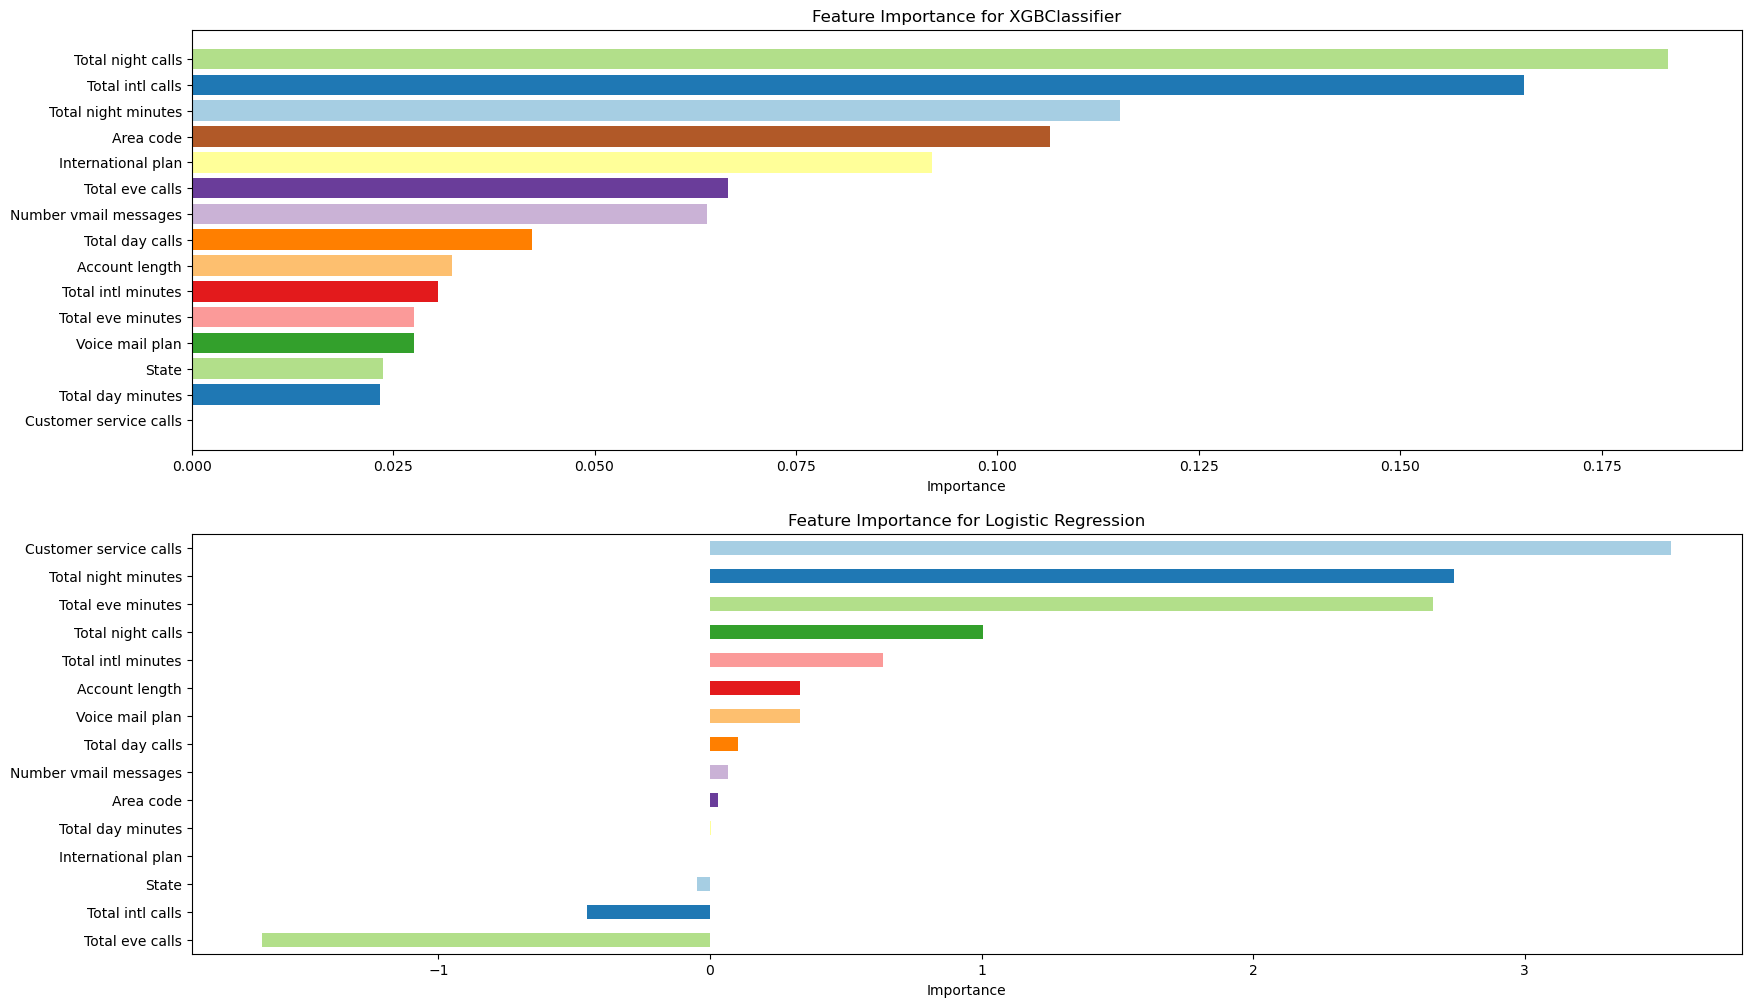

In [24]:
feature_importance()

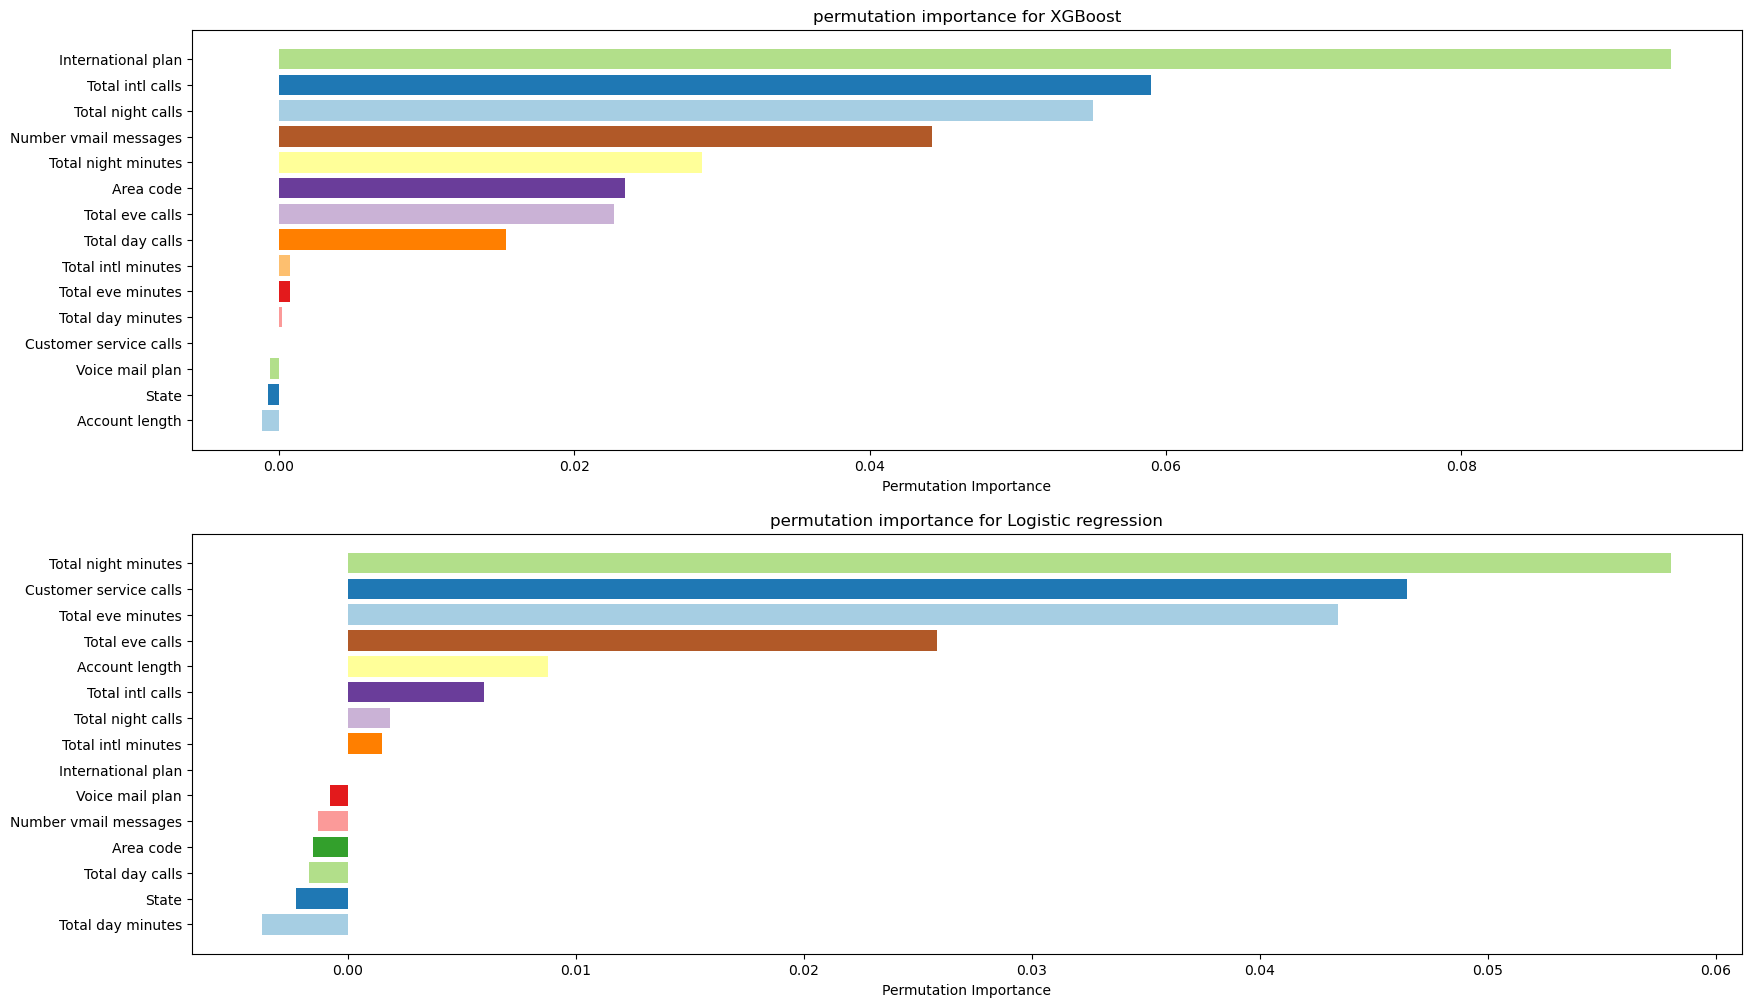

In [25]:
permut_importance()

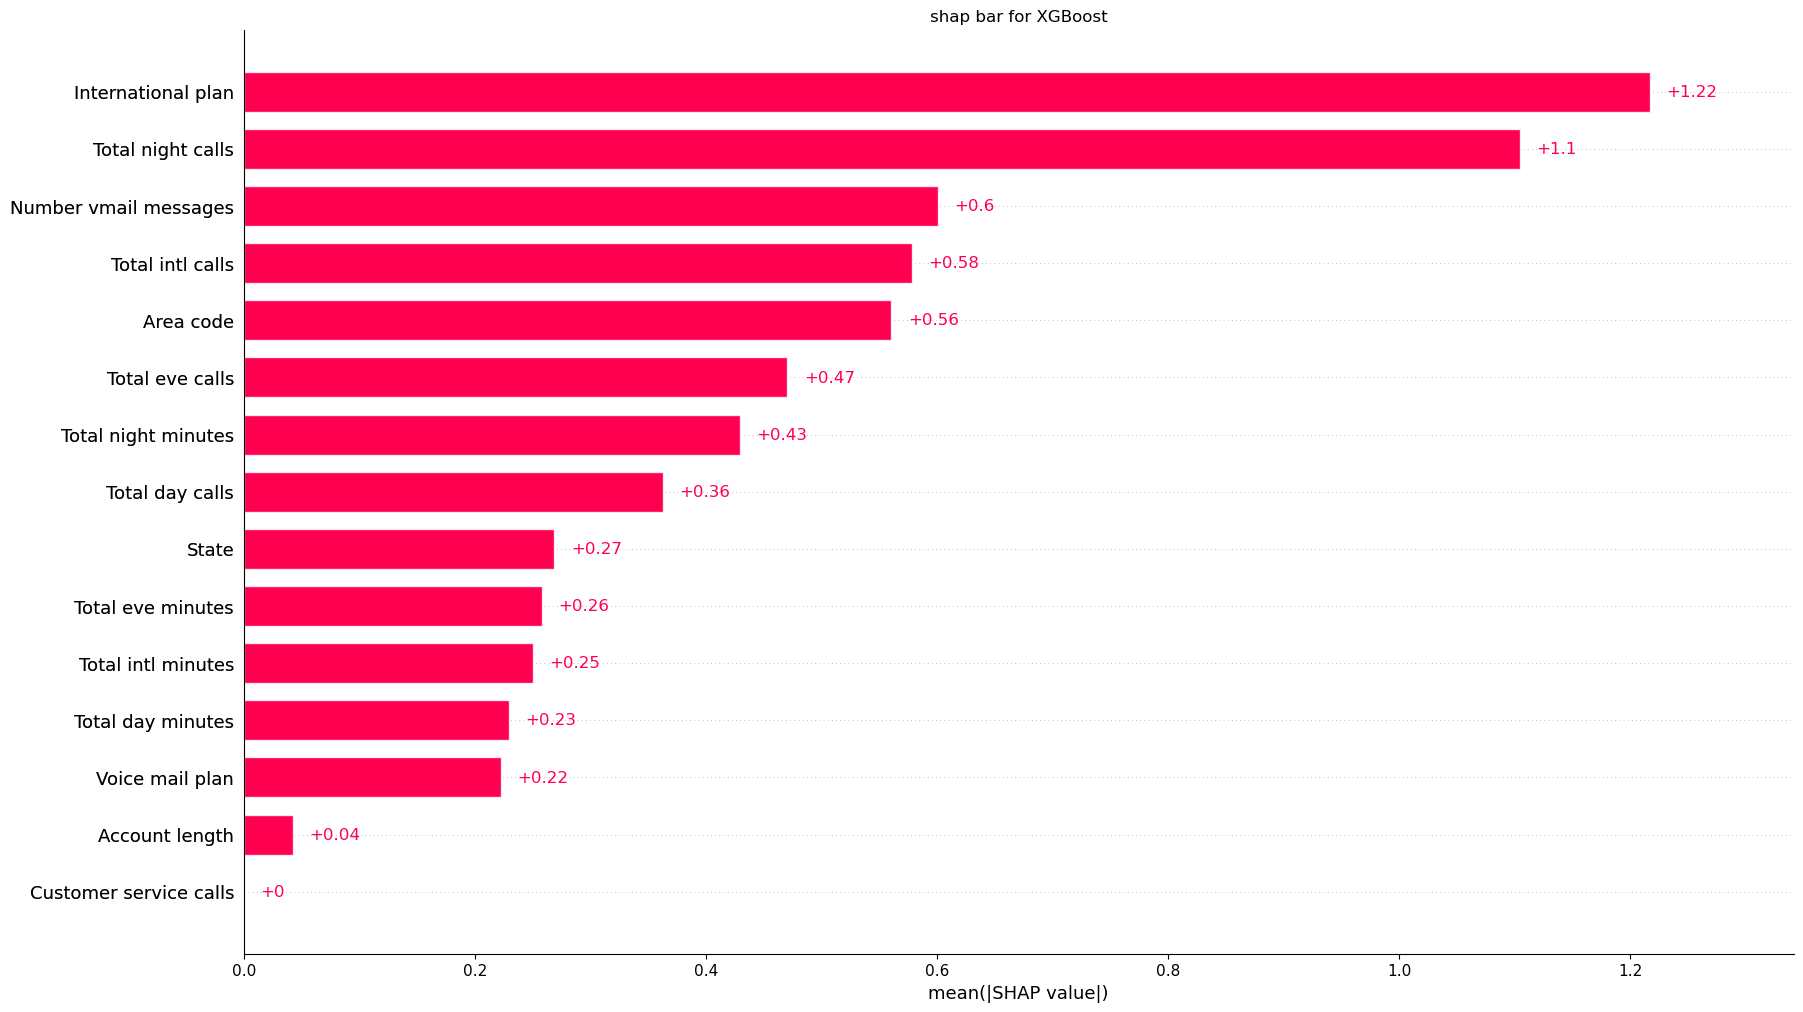

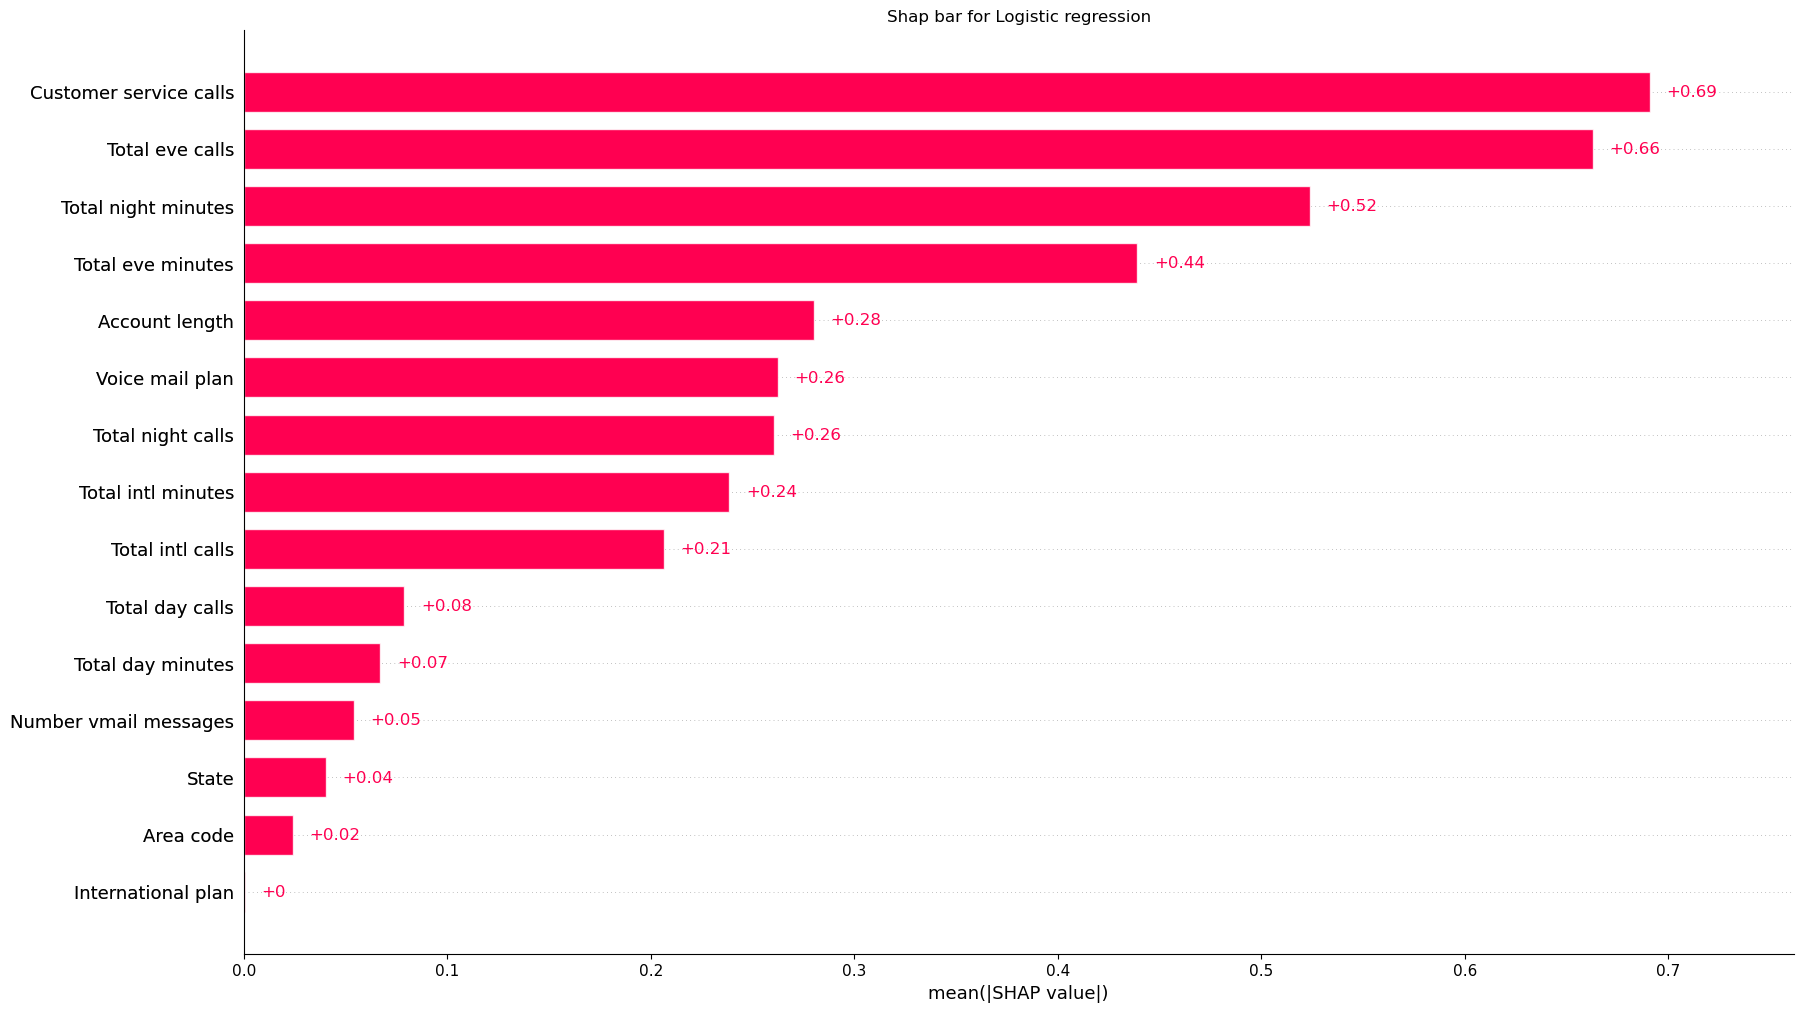

In [26]:
shap_bar()

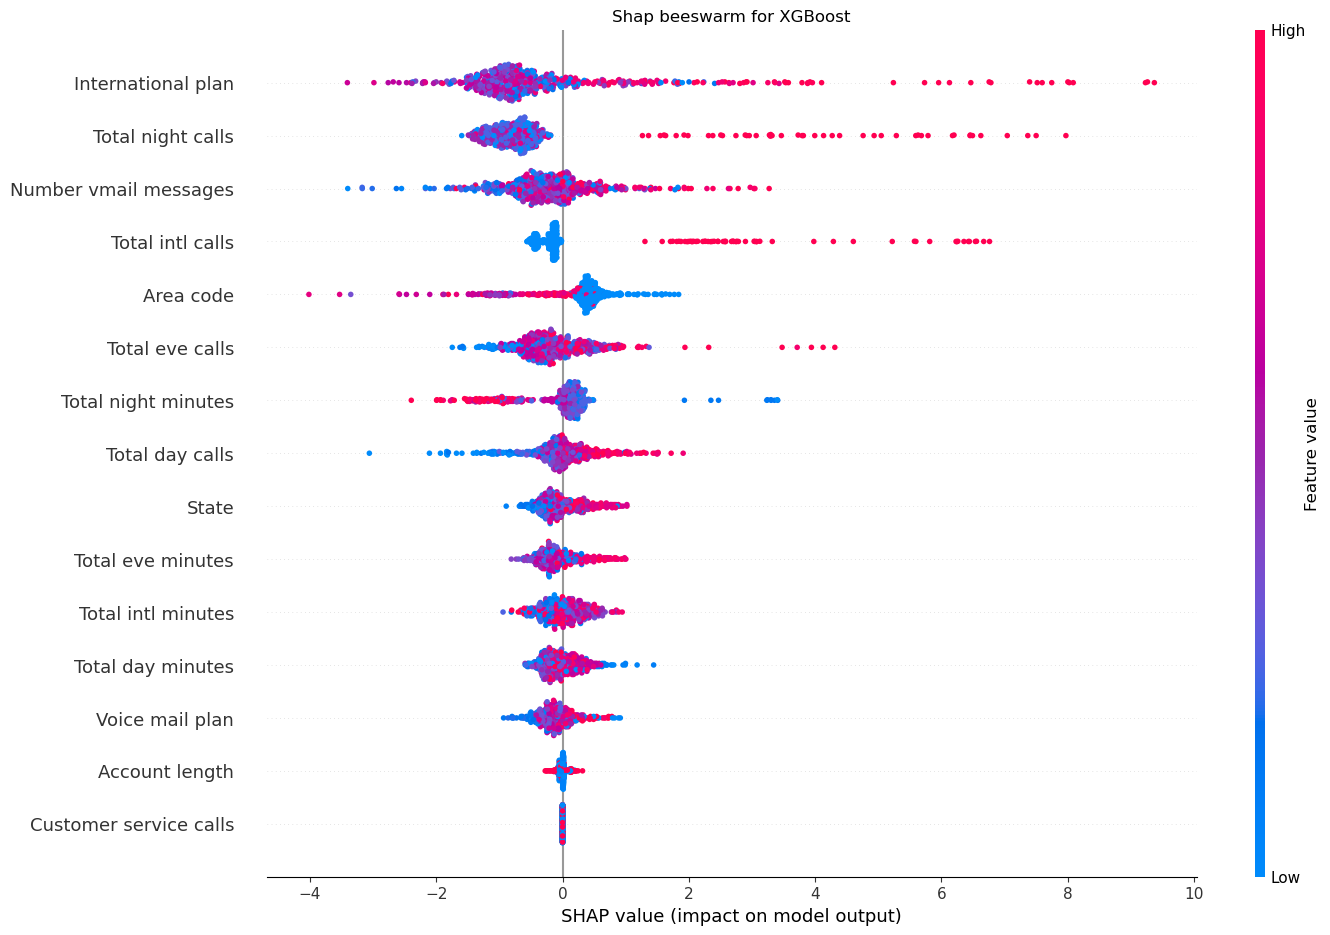

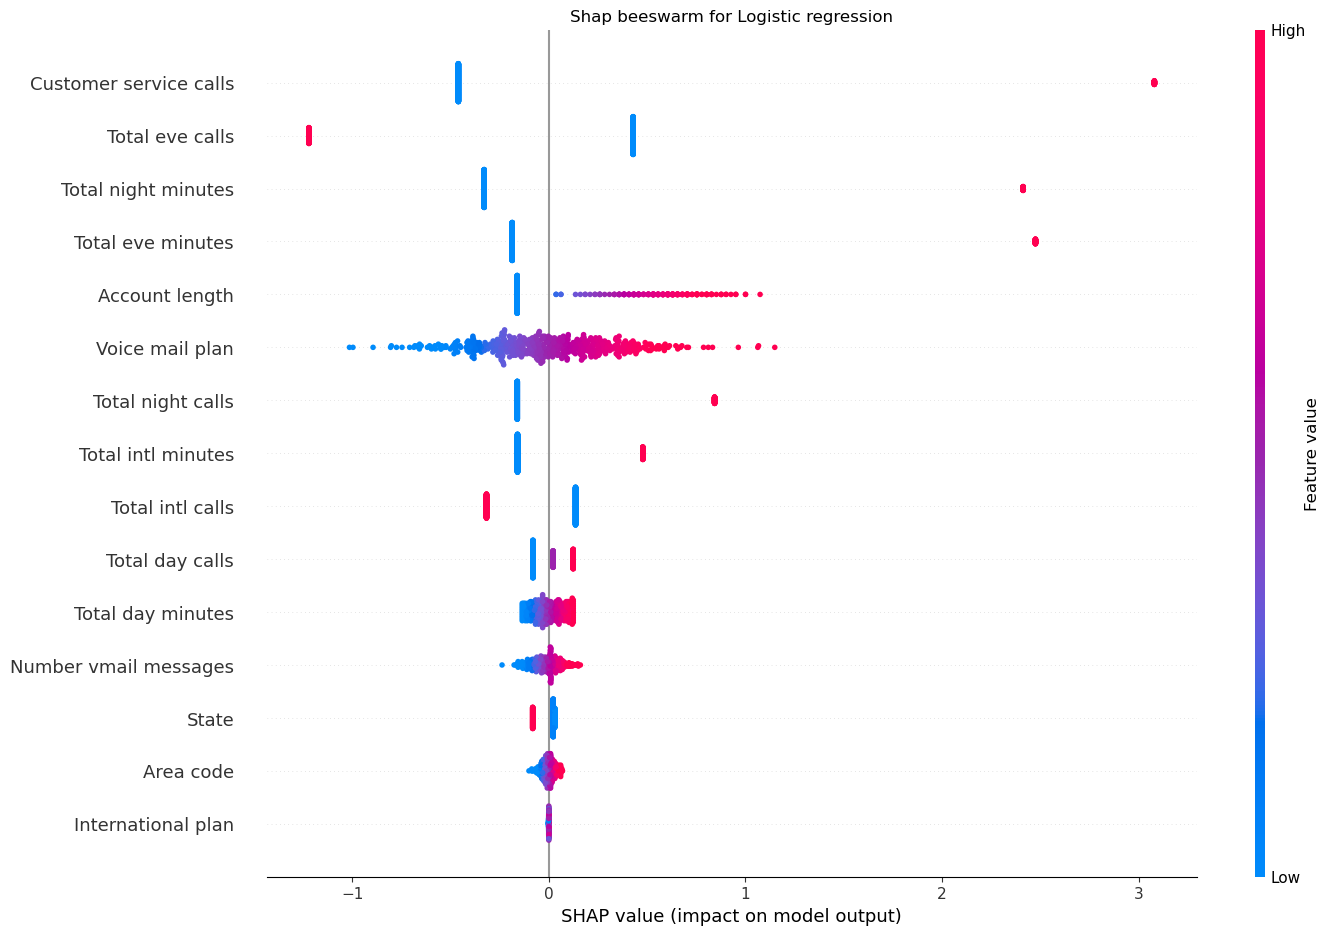

In [27]:
shap_beeswarm()

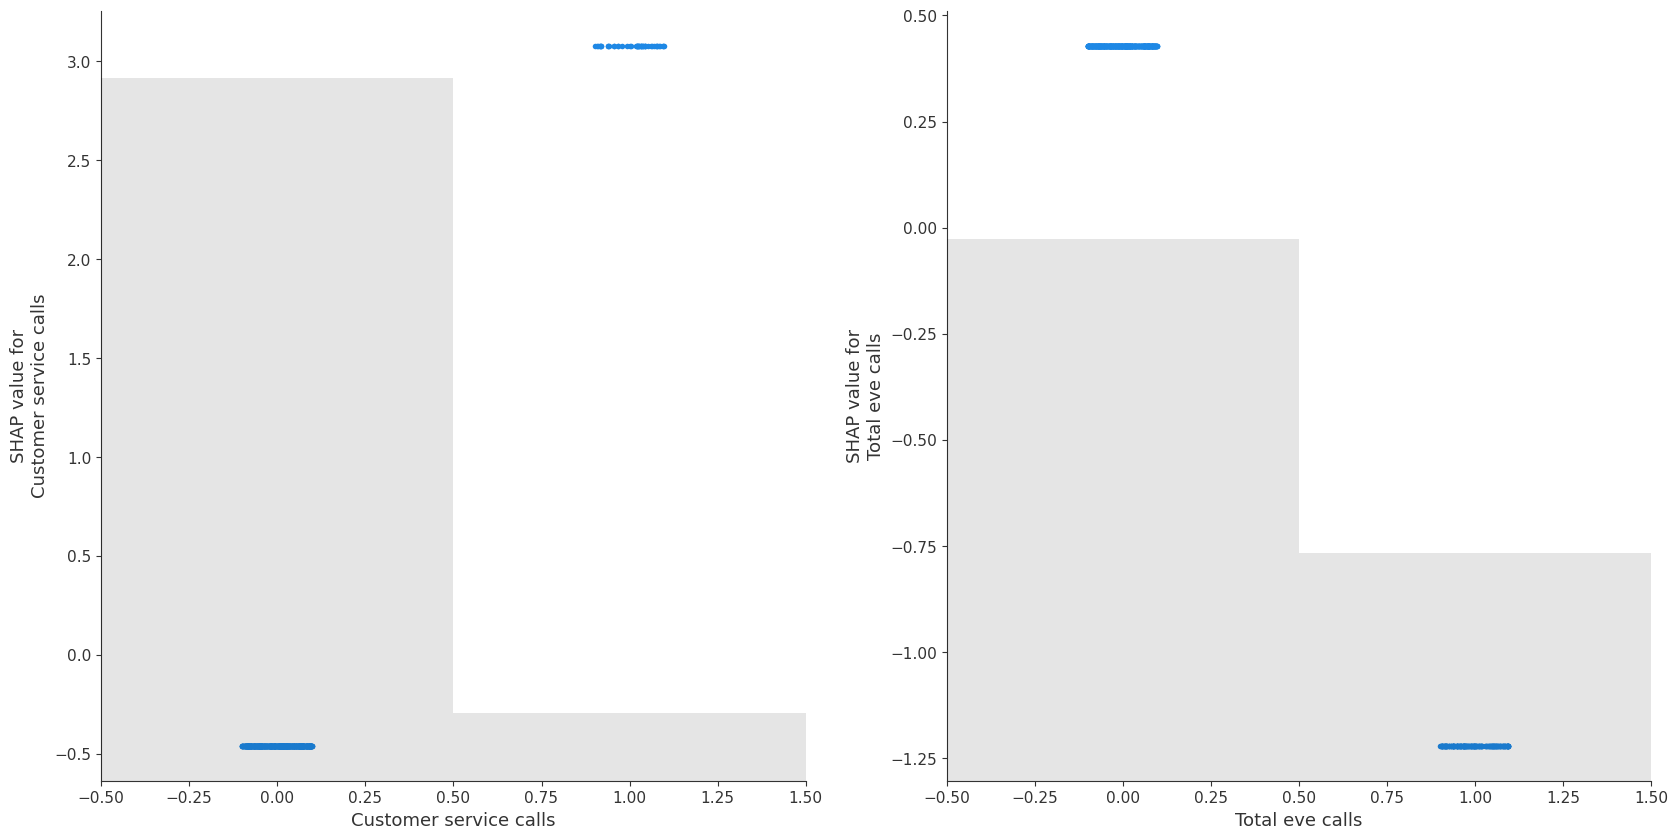

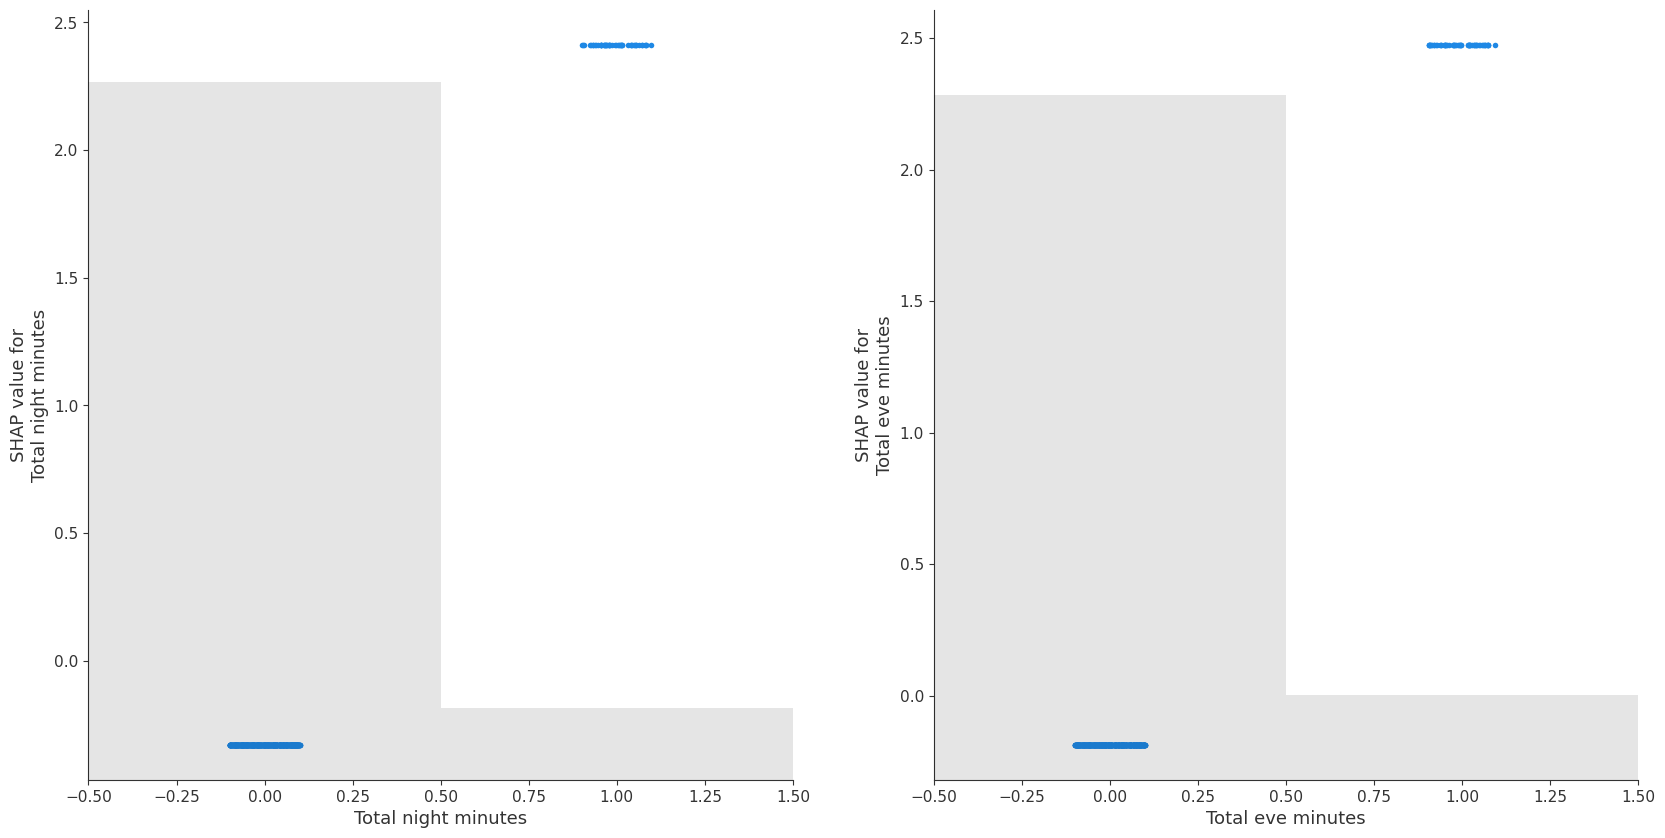

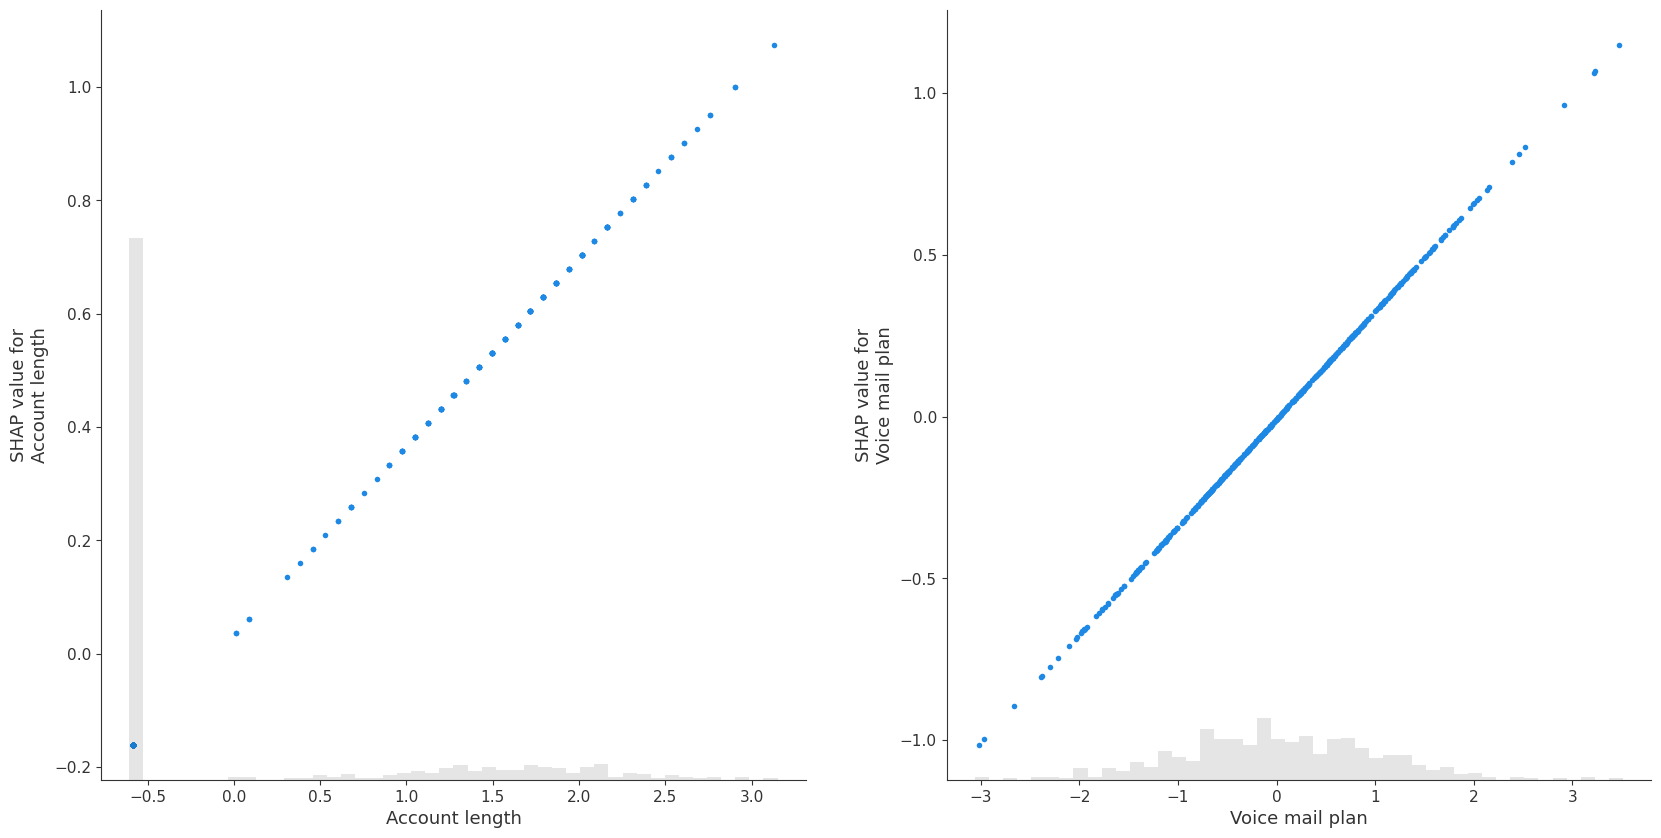

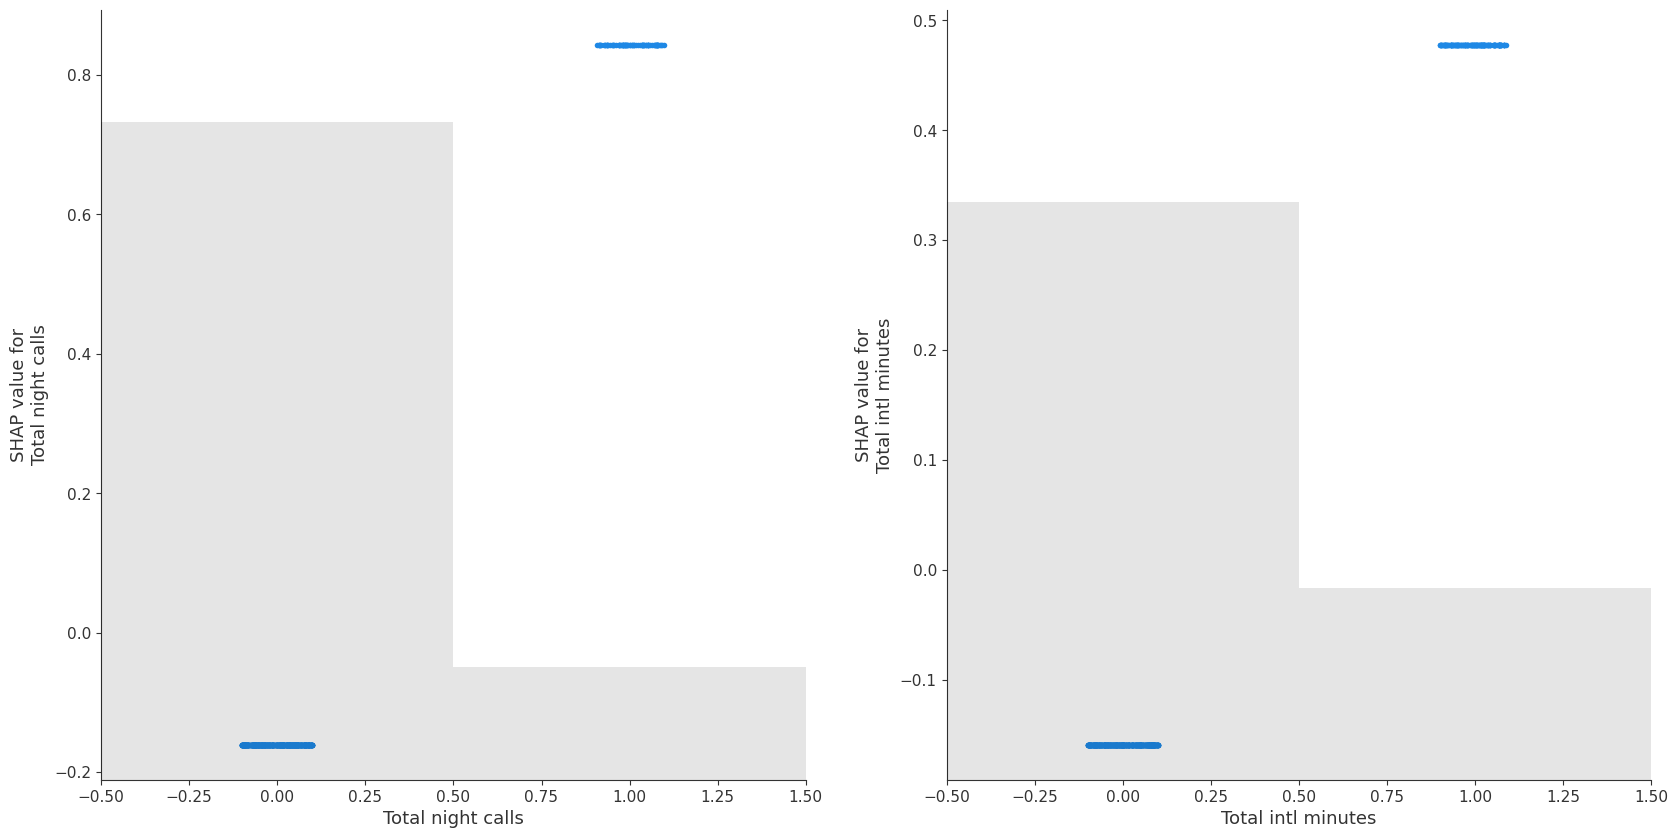

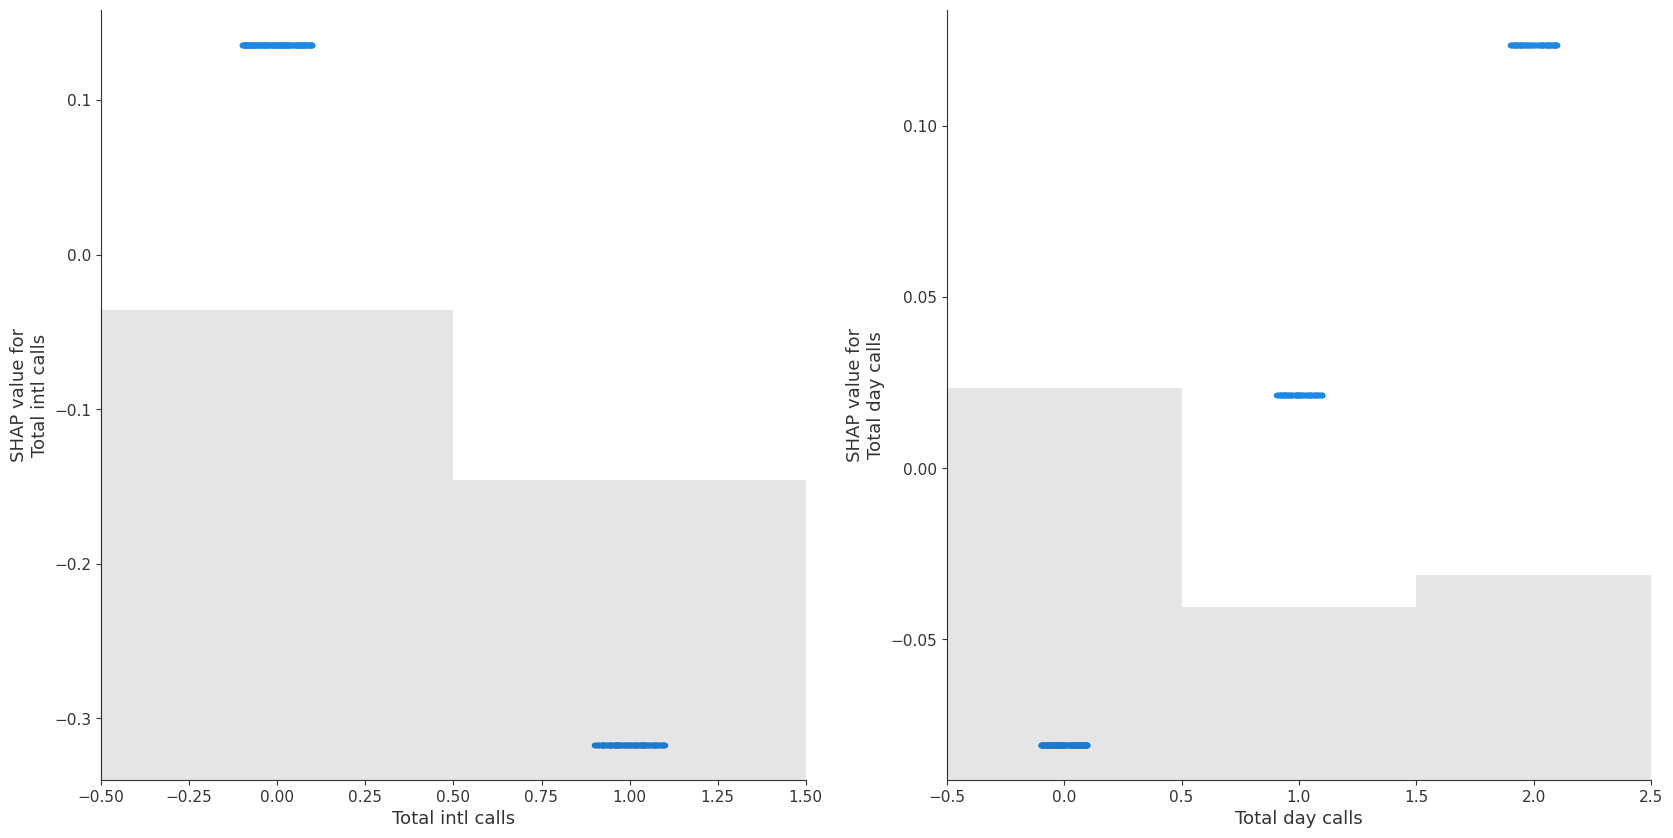

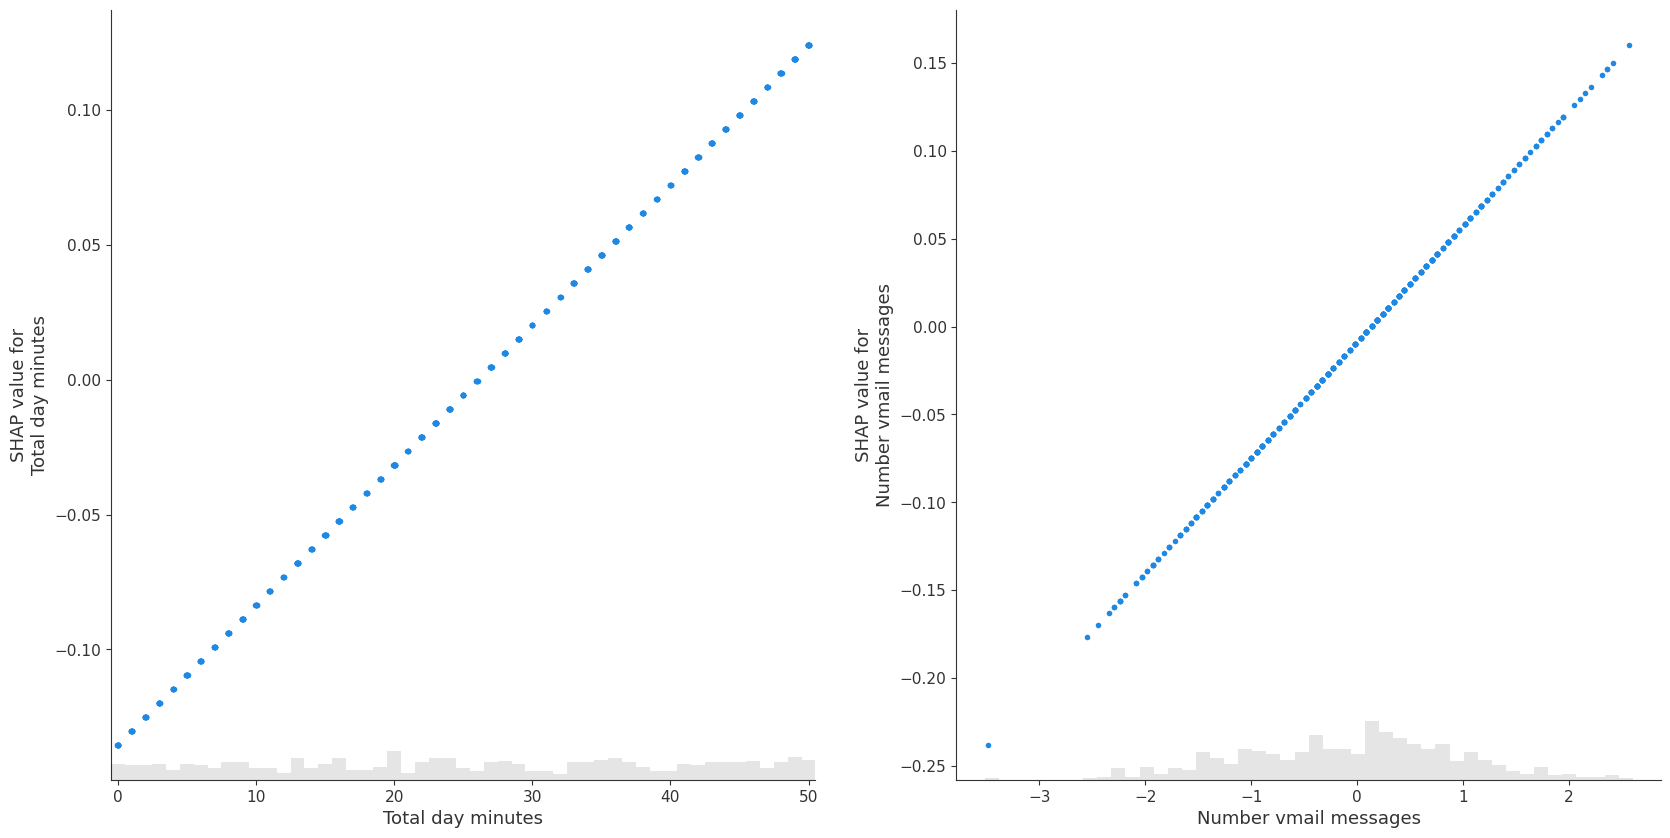

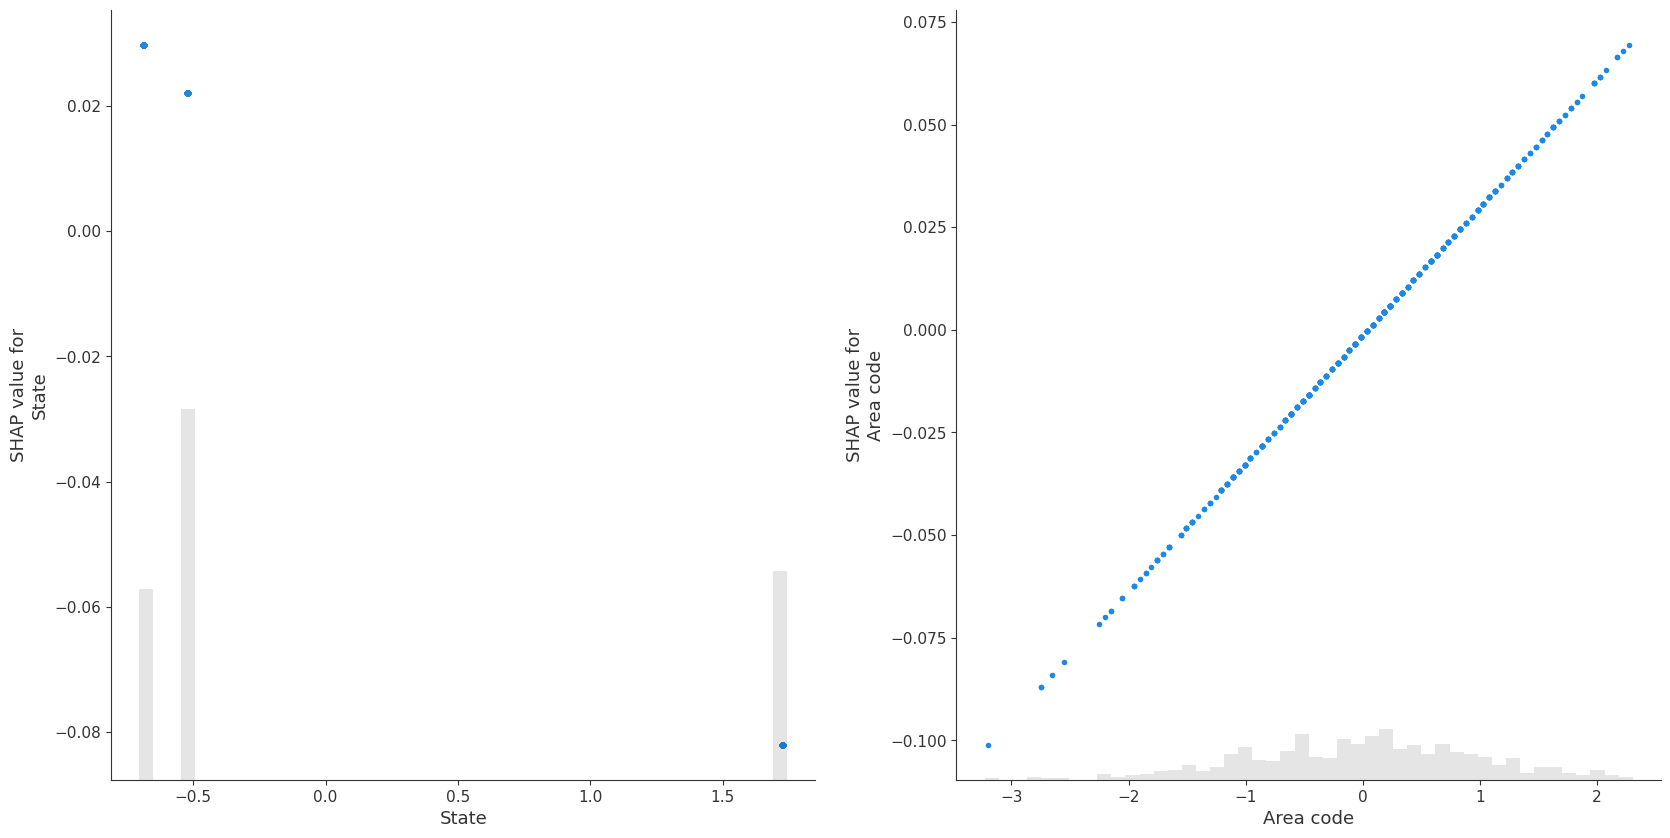

In [28]:
shap_scatter_lr(feature, shap_values['lr'])

#  Commentaires : 

**XGBoost:**

les valeurs de "International plan" et "Total night calls" ont une forte contribution positive à la prédiction de la probabilité de churn , càd les clients qui ont des niveaux de consommation la nuit plus élevées et ont souscrit un plan international ont une probabilité de churn plus élevée.

Des valeurs faibles de "Number vmail messages" contribuent à une probabilité de churn aussi faible et les valeurs élevées ont une contribution positive à la prédiction de la probabilité de churn
 
la variable "Total intl calls" a une forte contribution positive à la prédiction de la probabilité de churn. Ainsi, les clients qui effectuent un grand nombre d'appels internationaux ont une probabilité de churn plus élevée que les clients qui effectuent un nombre plus faible d'appels internationaux.

Des valeurs élevées de "Area Code" ont une contribution négative à la prédiction de la probabilité de churn , càd les clients qui ont "Area code" élevé ont une probabilité de churn faible

des valeurs élevées de "Total night minutes" contribuent à une prédiction faible de la probabilité de churn

Des valeurs élevées "Total day calls" contribuent positivement à la prédiction de la probabilité de churn alors que des valeurs faibles contribuent à la prédiction de cette prédiction négativement.

**Logistic Regression:**

Plus les valeurs de "Customer service calls", "Total night minutes", "Total eve minutes", "Account length", "Voice mail plan", "Total night calls", "Total intl minutes" plus les probabilités de churn augmentent aussi .

Les valeurs élevées de "Total eve calls" et "Total intl calls" ont une contribution négative à la prédiction de la probabilité de churn .